In [1]:
import streamlit as st
import pandas as pd
import requests
import numpy as np
import yfinance as yf
import matplotlib
%matplotlib inline
import random

C:\Users\brand\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import sys
print(sys.executable)

C:\Users\brand\anaconda3\python.exe


In [3]:
random.seed(42)
np.random.seed(42)

# Data Cleaning & Models

## Historical

In [4]:
tbill_path = '../data/3_month_t_bill.csv'
tbill = pd.read_csv(tbill_path)
tbill['decimal'] = tbill['TB3MS'] / 100
current_risk_free = tbill['decimal'].iloc[-1]
current_risk_free

0.0524

In [5]:
assets_path = '../data/asset_prices.csv'
assets = pd.read_csv(assets_path)
assets.dropna(inplace=True)
all_assets = assets.copy()
all_assets = all_assets[all_assets['DAY'] >= '2023-01-22']
assets = assets[assets['DAY'] >= '2023-03-22']
assets

DAY SYMBOL        PRICE
0      2024-05-23 00:00:00.000   CDAI     0.023379
1      2024-05-23 00:00:00.000    HOP     0.042247
2      2024-05-23 00:00:00.000   COMP    61.210000
3      2024-05-23 00:00:00.000   USDC     1.000000
4      2024-05-23 00:00:00.000   RETH  4164.540000
...                        ...    ...          ...
12007  2023-03-22 00:00:00.000      G     0.013997
12008  2023-03-22 00:00:00.000   USDC     1.010057
12009  2023-03-22 00:00:00.000   COMP    45.707408
12010  2023-03-22 00:00:00.000    RSR     0.004101
12011  2023-03-22 00:00:00.000   PAXG  1994.171241

[12012 rows x 3 columns]

In [6]:
all_assets_pivot = all_assets.pivot(index='DAY', columns='SYMBOL', values='PRICE').reset_index()
all_assets_pivot.set_index('DAY', inplace=True)
all_assets_pivot.columns = [f'DAILY_PRICE_{col}' for col in all_assets_pivot.columns]
all_assets_pivot

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                                           
2023-01-22 00:00:00.000         89.229891         0.006462         7.091551   
2023-01-23 00:00:00.000         87.993423         0.006462         7.049982   
2023-01-24 00:00:00.000         88.413674         0.006462         7.049390   
2023-01-25 00:00:00.000         86.696939         0.006462         6.901535   
2023-01-26 00:00:00.000         89.306431         0.006462         7.041247   
...                                   ...              ...              ...   
2024-05-19 00:00:00.000         88.520000         1.025000         3.580000   
2024-05-20 00:00:00.000         97.480000         1.130000         3.860000   
2024-05-21 00:00:00.000         99.500000         1.220000         4.000000   
2024-05-22 00:00:00.000         97.210000         1.210000         4.020000   
2024-05-23 00:00:00.000         95.870000         1.160000         3.960000   

                         DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                                             
2023-01-22 00:00:00.000          0.027577          0.014806         77.805422   
2023-01-23 00:00:00.000          0.027577          0.017209         77.805422   
2023-01-24 00:00:00.000          0.027577          0.017558         77.805422   
2023-01-25 00:00:00.000          0.027577          0.016392         77.805422   
2023-01-26 00:00:00.000          0.027577          0.016868         77.805422   
...                                   ...               ...               ...   
2024-05-19 00:00:00.000          0.023384          0.027455         62.970000   
2024-05-20 00:00:00.000          0.023399          0.028090         73.570000   
2024-05-21 00:00:00.000          0.023604          0.028904         76.500000   
2024-05-22 00:00:00.000          0.023422          0.028132         76.350000   
2024-05-23 00:00:00.000          0.023379          0.027495         75.620000   

                         DAILY_PRICE_COMP  DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  \
DAY                                                                             
2023-01-22 00:00:00.000         53.171666         463.184016        86.044910   
2023-01-23 00:00:00.000         53.748008         465.045274        85.159956   
2023-01-24 00:00:00.000         53.245861         465.620190        85.054341   
2023-01-25 00:00:00.000         51.354143         473.396814        81.843666   
2023-01-26 00:00:00.000         54.953221         468.150264        83.765201   
...                                   ...                ...              ...   
2024-05-19 00:00:00.000         57.020000        1351.300000       100.060000   
2024-05-20 00:00:00.000         59.590000        1397.610000       109.170000   
2024-05-21 00:00:00.000         62.390000        1436.750000       115.740000   
2024-05-22 00:00:00.000         62.120000        1414.080000       114.450000   
2024-05-23 00:00:00.000         61.210000        1395.800000       111.780000   

                         DAILY_PRICE_ENS  ...  DAILY_PRICE_RETH  \
DAY                                       ...                     
2023-01-22 00:00:00.000        15.040093  ...       1770.385012   
2023-01-23 00:00:00.000        15.217766  ...       1752.609531   
2023-01-24 00:00:00.000        15.122363  ...       1753.214248   
2023-01-25 00:00:00.000        14.732804  ...       1709.973065   
2023-01-26 00:00:00.000        15.423502  ...       1730.804510   
...                                  ...  ...               ...   
2024-05-19 00:00:00.000        15.340000  ...       3471.410000   
2024-05-20 00:00:00.000        18.060000  ...       4041.830000   
2024-05-21 00:00:00.000        21.570000  ...       4214.140000   
2024-05-22 00:00:00.000        22.300000  ...       4202.870000   
2024-05-23 00:00:00.000        22.180000  ...       4164.540000   

                 

In [7]:
all_assets_pivot.describe()

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  DAILY_PRICE_CDAI  \
count        488.000000       488.000000       488.000000        488.000000   
mean          84.826077         1.162493         4.814519          0.026935   
std           20.189919         0.585476         1.274222          0.001544   
min           50.880619         0.006462         2.982007          0.022956   
25%           68.283094         0.964087         3.757454          0.027577   
50%           83.629886         1.161694         4.464531          0.027577   
75%           97.293748         1.442142         5.608320          0.027577   
max          150.004581         5.040700         7.637407          0.027577   

       DAILY_PRICE_CELR  DAILY_PRICE_CETH  DAILY_PRICE_COMP  \
count        488.000000        488.000000        488.000000   
mean           0.020252         75.804697         53.385560   
std            0.006351          4.954388         13.813292   
min            0.011238         56.358668         26.830328   
25%            0.015248         77.805422         43.099089   
50%            0.019472         77.805422         52.916957   
75%            0.023897         77.805422         58.786855   
max            0.038868         81.795335        101.769037   

       DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  DAILY_PRICE_ENS  ...  \
count         488.000000       488.000000       488.000000  ...   
mean          777.648032        89.666815        13.285725  ...   
std           299.360986        22.619639         5.353070  ...   
min           411.314787        56.445045         6.825129  ...   
25%           577.761129        72.121179         8.893970  ...   
50%           613.174974        84.674397        12.063160  ...   
75%           886.886219        99.868904        16.114757  ...   
max          1479.002425       160.547280        29.333239  ...   

       DAILY_PRICE_RETH  DAILY_PRICE_RPL  DAILY_PRICE_RSR  DAILY_PRICE_SOL  \
count        488.000000       488.000000       488.000000       488.000000   
mean        2417.652152        33.717782         0.003749        63.079678   
std          758.514813         9.892386         0.002150        55.842871   
min         1537.496328        18.526159         0.001712        14.774575   
25%         1881.772635        26.490727         0.002220        21.554781   
50%         2051.303734        31.143758         0.002942        25.345415   
75%         2630.366766        41.366568         0.004436       103.658174   
max         4482.072614        61.205782         0.013125       209.828971   

       DAILY_PRICE_STG  DAILY_PRICE_UNI  DAILY_PRICE_USDC  DAILY_PRICE_WBTC  \
count       488.000000       488.000000        488.000000        488.000000   
mean          0.641924         6.789207          1.028711      38305.724433   
std           0.151143         2.412859          0.407300      15182.995418   
min           0.396080         3.954053          0.971359      20381.851873   
25%           0.540197         5.298769          1.001927      27278.175757   
50%           0.612635         6.289761          1.004422      30368.846263   
75%           0.721778         7.034911          1.012852      44109.703155   
max           1.351916        16.240105          9.996563      73438.397853   

       DAILY_PRICE_WETH  DAILY_PRICE_WSTETH  
count        488.000000          488.000000  
mean        2205.466159         2519.124190  
std          651.164428          778.466704  
min         1439.307319         1600.340465  
25%         1737.243201         1967.957884  
50%         1906.727339         2148.663465  
75%         2403.253112         2761.400740  
max         4064.937076         4711.805155  

[8 rows x 28 columns]

In [8]:
import pandas as pd

# Assuming 'assets' data is loaded into a DataFrame called assets_df

# Convert 'DAY' to datetime
assets['DAY'] = pd.to_datetime(assets['DAY'])

# Pivot the data to have symbols as columns
pivot_assets = assets.pivot(index='DAY', columns='SYMBOL', values='PRICE').reset_index()

# Display the pivoted DataFrame
print(pivot_assets.head())
pivot_assets.set_index('DAY', inplace=True)

SYMBOL        DAY       AAVE       ARB       BAL      CDAI      CELR  \
0      2023-03-22  79.461948  0.006462  6.802698  0.027577  0.024491   
1      2023-03-23  80.428747  5.040700  7.088430  0.027577  0.027595   
2      2023-03-24  77.534546  1.530576  7.086101  0.027577  0.027602   
3      2023-03-25  73.688440  1.293759  6.782021  0.027577  0.029137   
4      2023-03-26  73.482201  1.339754  6.817793  0.027577  0.027798   

SYMBOL       CETH       COMP       CWBTC        DPI  ...         RETH  \
0       77.805422  45.707408  578.460823  84.457211  ...  1943.193724   
1       77.805422  44.715594  577.837315  83.412666  ...  1978.132073   
2       77.805422  44.523301  573.250163  82.238418  ...  1952.633363   
3       77.805422  42.745369  560.406636  78.278926  ...  1893.528757   
4       77.805422  43.097157  568.366841  78.453328  ...  1924.050865   

SYMBOL        RPL       RSR        SOL       STG       UNI      USDC  \
0       41.027989  0.004101  22.885376  0.750757  6.4643

In [9]:
pivot_assets.columns = [f'DAILY_PRICE_{col}' for col in pivot_assets.columns]
pivot_assets = pivot_assets.reset_index()
pivot_assets

DAY  DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
0   2023-03-22         79.461948         0.006462         6.802698   
1   2023-03-23         80.428747         5.040700         7.088430   
2   2023-03-24         77.534546         1.530576         7.086101   
3   2023-03-25         73.688440         1.293759         6.782021   
4   2023-03-26         73.482201         1.339754         6.817793   
..         ...               ...              ...              ...   
424 2024-05-19         88.520000         1.025000         3.580000   
425 2024-05-20         97.480000         1.130000         3.860000   
426 2024-05-21         99.500000         1.220000         4.000000   
427 2024-05-22         97.210000         1.210000         4.020000   
428 2024-05-23         95.870000         1.160000         3.960000   

     DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  DAILY_PRICE_COMP  \
0            0.027577          0.024491         77.805422         45.707408   
1            0.027577          0.027595         77.805422         44.715594   
2            0.027577          0.027602         77.805422         44.523301   
3            0.027577          0.029137         77.805422         42.745369   
4            0.027577          0.027798         77.805422         43.097157   
..                ...               ...               ...               ...   
424          0.023384          0.027455         62.970000         57.020000   
425          0.023399          0.028090         73.570000         59.590000   
426          0.023604          0.028904         76.500000         62.390000   
427          0.023422          0.028132         76.350000         62.120000   
428          0.023379          0.027495         75.620000         61.210000   

     DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  ...  DAILY_PRICE_RETH  \
0           578.460823        84.457211  ...       1943.193724   
1           577.837315        83.412666  ...       1978.132073   
2           573.250163        82.238418  ...       1952.633363   
3           560.406636        78.278926  ...       1893.528757   
4           568.366841        78.453328  ...       1924.050865   
..                 ...              ...  ...               ...   
424        1351.300000       100.060000  ...       3471.410000   
425        1397.610000       109.170000  ...       4041.830000   
426        1436.750000       115.740000  ...       4214.140000   
427        1414.080000       114.450000  ...       4202.870000   
428        1395.800000       111.780000  ...       4164.540000   

     DAILY_PRICE_RPL  DAILY_PRICE_RSR  DAILY_PRICE_SOL  DAILY_PRICE_STG  \
0          41.027989         0.004101        22.885376         0.750757   
1          40.578442         0.004150        26.028662         0.714423   
2          40.343656         0.004183        22.130990         0.718028   
3          38.857283         0.004009        21.123700         0.665835   
4          42.375331         0.003943        21.123650         0.662433   
..               ...              ...              ...              ...   
424        19.650000         0.009408       175.190000         0.461871   
425        20.520000         0.010004       194.280000         0.468372   
426        21.580000         0.009444       189.480000         0.479769   
427        22.800000         0.008774       182.220000         0.490497   
428        21.660000         0.008433       178.200000         0.498969   

     DAILY_PRICE_UNI  DAILY_PRICE_USDC  DAILY_PRICE_WBTC  DAILY_PRICE_WETH  \
0           6.464313          1.010057      28791.601013       1817.378490   
1           6.448413          1.011716      28754.493594       1846.091458   
2           6.314177          1.008786      28510.610009       1824.260370   
3           6.008362          1.008728      27881.394353       1766.906936   
4           5.870104          1.008116      28280.352719       1799.517247   
..               ...               ...               ...   

In [10]:
panamadao_path = '../data/panamadao_returns.csv'
panamadao_returns = pd.read_csv(panamadao_path)
panamadao_returns.dropna(inplace=True)
panamadao_returns

DAY SYMBOL  TOTAL_FILLED_BALANCE  DAILY_PRICE  \
0     2023-03-22 00:00:00.000    ETH              0.100000  1743.360000   
1     2023-03-22 00:00:00.000   USDC              0.000000     1.000000   
2     2023-03-22 00:00:00.000   WETH              0.000000  1743.360000   
3     2023-03-23 00:00:00.000    ETH              0.140000  1825.050000   
4     2023-03-23 00:00:00.000   USDC              0.000000     1.000000   
...                       ...    ...                   ...          ...   
1258  2024-05-14 00:00:00.000   USDC            270.659535     0.999893   
1259  2024-05-14 00:00:00.000   WETH              0.001900  2881.980000   
1260  2024-05-15 00:00:00.000    ETH             11.230723  3021.480000   
1261  2024-05-15 00:00:00.000   USDC            270.659535     1.000000   
1262  2024-05-15 00:00:00.000   WETH              0.001900  3021.480000   

      TOTAL_VALUE_IN_USD  TOTAL_USD_IN_TREASURY  COMPOSITION  
0             174.336000             174.336000     1.000000  
1               0.000000             174.336000     0.000000  
2               0.000000             174.336000     0.000000  
3             255.507000             255.507000     1.000000  
4               0.000000             255.507000     0.000000  
...                  ...                    ...          ...  
1258          270.630574           32341.145506     0.008368  
1259            5.475762           32341.145506     0.000169  
1260        33933.404930           34209.805277     0.991920  
1261          270.659535           34209.805277     0.007912  
1262            5.740812           34209.805277     0.000168  

[1263 rows x 7 columns]

In [11]:
panama_dao_assets = panamadao_returns['SYMBOL'].unique()

In [12]:
# Convert 'DAY' to datetime
panamadao_returns['DAY'] = pd.to_datetime(panamadao_returns['DAY'])

# Sort by 'DAY' and 'SYMBOL'
panamadao_returns = panamadao_returns.sort_values(by=['DAY', 'SYMBOL'])

# Calculate previous day price
panamadao_returns['prev_day_price'] = panamadao_returns.groupby('SYMBOL')['DAILY_PRICE'].shift(1)

# Calculate daily return
panamadao_returns['daily_return'] = (panamadao_returns['DAILY_PRICE'] - panamadao_returns['prev_day_price']) / panamadao_returns['prev_day_price']

# Calculate weighted daily return
panamadao_returns['weighted_daily_return1'] = panamadao_returns['daily_return'] * panamadao_returns['COMPOSITION']

# Filter dates after '2023-07-01'
filtered_returns = panamadao_returns

# Calculate weighted daily return per day
weighted_daily_returns = filtered_returns.groupby('DAY').apply(lambda x: (x['daily_return'] * x['COMPOSITION']).sum()).reset_index(name='weighted_daily_return')

# Calculate cumulative returns
weighted_daily_returns['daily_factor'] = 1 + weighted_daily_returns['weighted_daily_return']
weighted_daily_returns['cumulative_return'] = (np.exp(np.log(weighted_daily_returns['daily_factor']).cumsum()) - 1)

# Calculate metrics
average_daily_return = weighted_daily_returns['weighted_daily_return'].mean()
stddev_daily_return = weighted_daily_returns['weighted_daily_return'].std()

# Calculate Sharpe ratio
annualized_return = average_daily_return * 365
annualized_risk = stddev_daily_return * np.sqrt(365)
sharpe_ratio = (annualized_return - current_risk_free) / annualized_risk

# Prepare base return
base_return = weighted_daily_returns[['DAY', 'cumulative_return']].copy()
base_return = base_return.dropna().rename(columns={'cumulative_return': 'base_cumulative_return'})

# Combine results
combined = base_return[['DAY', 'base_cumulative_return']].sort_values('DAY')

# Normalize returns
first_value = combined['base_cumulative_return'].iloc[0]
combined['PanamaDAO_treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))

# Final output
historical_normalized_returns = combined[['DAY', 'PanamaDAO_treasury_return']]

print(historical_normalized_returns)

           DAY  PanamaDAO_treasury_return
0   2023-03-22                 100.000000
1   2023-03-23                 104.685779
2   2023-03-24                 101.257342
3   2023-03-25                 100.418732
4   2023-03-26                 102.108572
..         ...                        ...
416 2024-05-11                 166.906223
417 2024-05-12                 167.761691
418 2024-05-13                 168.638729
419 2024-05-14                 164.987403
420 2024-05-15                 172.910446

[421 rows x 2 columns]


C:\Users\brand\AppData\Local\Temp\ipykernel_18364\1859384667.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_daily_returns = filtered_returns.groupby('DAY').apply(lambda x: (x['daily_return'] * x['COMPOSITION']).sum()).reset_index(name='weighted_daily_return')


In [13]:
historical_normalized_returns.set_index('DAY', inplace=True)

<Axes: xlabel='DAY'>

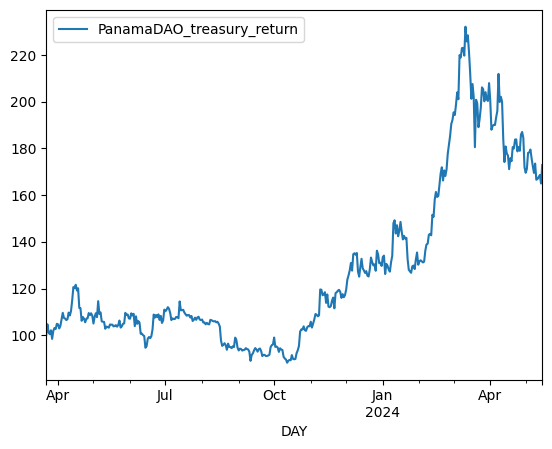

In [14]:
historical_normalized_returns.plot()

In [15]:
panamadao_returns

DAY SYMBOL  TOTAL_FILLED_BALANCE  DAILY_PRICE  TOTAL_VALUE_IN_USD  \
0    2023-03-22    ETH              0.100000  1743.360000          174.336000   
1    2023-03-22   USDC              0.000000     1.000000            0.000000   
2    2023-03-22   WETH              0.000000  1743.360000            0.000000   
3    2023-03-23    ETH              0.140000  1825.050000          255.507000   
4    2023-03-23   USDC              0.000000     1.000000            0.000000   
...         ...    ...                   ...          ...                 ...   
1258 2024-05-14   USDC            270.659535     0.999893          270.630574   
1259 2024-05-14   WETH              0.001900  2881.980000            5.475762   
1260 2024-05-15    ETH             11.230723  3021.480000        33933.404930   
1261 2024-05-15   USDC            270.659535     1.000000          270.659535   
1262 2024-05-15   WETH              0.001900  3021.480000            5.740812   

      TOTAL_USD_IN_TREASURY  COMPOSITION  prev_day_price  daily_return  \
0                174.336000     1.000000             NaN           NaN   
1                174.336000     0.000000             NaN           NaN   
2                174.336000     0.000000             NaN           NaN   
3                255.507000     1.000000     1743.360000      0.046858   
4                255.507000     0.000000        1.000000      0.000000   
...                     ...          ...             ...           ...   
1258           32341.145506     0.008368        0.999938     -0.000045   
1259           32341.145506     0.000169     2946.310000     -0.021834   
1260           34209.805277     0.991920     2881.980000      0.048404   
1261           34209.805277     0.007912        0.999893      0.000107   
1262           34209.805277     0.000168     2881.980000      0.048404   

      weighted_daily_return1  
0                        NaN  
1                        NaN  
2                        NaN  
3               4.685779e-02  
4               0.000000e+00  
...                      ...  
1258           -3.765832e-07  
1259           -3.696786e-06  
1260            4.801314e-02  
1261            8.466482e-07  
1262            8.122804e-06  

[1263 rows x 10 columns]

In [16]:
pivot_data = panamadao_returns.pivot(index='DAY', columns='SYMBOL', values=['TOTAL_FILLED_BALANCE', 'DAILY_PRICE', 'TOTAL_VALUE_IN_USD', 'COMPOSITION'])
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]
pivot_data = pivot_data.reset_index()

In [17]:
pivot_data.set_index('DAY', inplace=True)
pivot_data

TOTAL_FILLED_BALANCE_ETH  TOTAL_FILLED_BALANCE_USDC  \
DAY                                                               
2023-03-22                  0.100000                   0.000000   
2023-03-23                  0.140000                   0.000000   
2023-03-24                  0.437000                   0.000000   
2023-03-25                  0.437000                   0.000000   
2023-03-26                  0.447000                   0.000000   
...                              ...                        ...   
2024-05-11                 11.047240                 270.659535   
2024-05-12                 11.062640                 270.659535   
2024-05-13                 11.090865                 270.659535   
2024-05-14                 11.126045                 270.659535   
2024-05-15                 11.230723                 270.659535   

            TOTAL_FILLED_BALANCE_WETH  DAILY_PRICE_ETH  DAILY_PRICE_USDC  \
DAY                                                                        
2023-03-22                     0.0000          1743.36          1.000000   
2023-03-23                     0.0000          1825.05          1.000000   
2023-03-24                     0.0000          1765.28          1.010000   
2023-03-25                     0.0000          1750.66          1.010000   
2023-03-26                     0.0000          1780.12          0.999827   
...                               ...              ...               ...   
2024-05-11                     0.0019          2915.79          1.000000   
2024-05-12                     0.0019          2930.86          0.999977   
2024-05-13                     0.0019          2946.31          0.999938   
2024-05-14                     0.0019          2881.98          0.999893   
2024-05-15                     0.0019          3021.48          1.000000   

            DAILY_PRICE_WETH  TOTAL_VALUE_IN_USD_ETH  TOTAL_VALUE_IN_USD_USDC  \
DAY                                                                             
2023-03-22           1743.36              174.336000                 0.000000   
2023-03-23           1825.05              255.507000                 0.000000   
2023-03-24           1765.28              771.427360                 0.000000   
2023-03-25           1750.66              765.038420                 0.000000   
2023-03-26           1780.12              795.713640                 0.000000   
...                      ...                     ...                      ...   
2024-05-11           2915.79            32211.431920               270.659535   
2024-05-12           2930.86            32423.049070               270.653310   
2024-05-13           2946.31            32677.126458               270.642754   
2024-05-14           2881.98            32065.039169               270.630574   
2024-05-15           3021.48            33933.404930               270.659535   

            TOTAL_VALUE_IN_USD_WETH  COMPOSITION_ETH  COMPOSITION_USDC  \
DAY                                                                      
2023-03-22                 0.000000         1.000000          0.000000   
2023-03-23                 0.000000         1.000000          0.000000   
2023-03-24                 0.000000         1.000000          0.000000   
2023-03-25                 0.000000         1.000000          0.000000   
2023-03-26                 0.000000         1.000000          0.000000   
...                             ...              ...               ...   
2024-05-11                 5.540001         0.991498          0.008331   
2024-05-12                 5.568634         0.991553          0.008277   
2024-05-13                 5.597989         0.991617          0.008213   
2024-05-14                 5.475762         0.991463          0.008368   
2024-05-15                 5.740812         0.991920          0.007912   

            COMPOSITION_WETH  
DAY                           
2023-03-22          0.000000  
2023-03-23          0.000000  
2023-03-24

In [18]:
filtered_columns = [col for col in pivot_data.columns if 'COMPOSITION_' in col or 'DAILY_PRICE_' in col]
pivot_data_filtered = pivot_data[filtered_columns]
pivot_data_filtered


DAILY_PRICE_ETH  DAILY_PRICE_USDC  DAILY_PRICE_WETH  \
DAY                                                               
2023-03-22          1743.36          1.000000           1743.36   
2023-03-23          1825.05          1.000000           1825.05   
2023-03-24          1765.28          1.010000           1765.28   
2023-03-25          1750.66          1.010000           1750.66   
2023-03-26          1780.12          0.999827           1780.12   
...                     ...               ...               ...   
2024-05-11          2915.79          1.000000           2915.79   
2024-05-12          2930.86          0.999977           2930.86   
2024-05-13          2946.31          0.999938           2946.31   
2024-05-14          2881.98          0.999893           2881.98   
2024-05-15          3021.48          1.000000           3021.48   

            COMPOSITION_ETH  COMPOSITION_USDC  COMPOSITION_WETH  
DAY                                                              
2023-03-22         1.000000          0.000000          0.000000  
2023-03-23         1.000000          0.000000          0.000000  
2023-03-24         1.000000          0.000000          0.000000  
2023-03-25         1.000000          0.000000          0.000000  
2023-03-26         1.000000          0.000000          0.000000  
...                     ...               ...               ...  
2024-05-11         0.991498          0.008331          0.000171  
2024-05-12         0.991553          0.008277          0.000170  
2024-05-13         0.991617          0.008213          0.000170  
2024-05-14         0.991463          0.008368          0.000169  
2024-05-15         0.991920          0.007912          0.000168  

[421 rows x 6 columns]

In [19]:
# Convert assets DataFrame to wide format
assets_pivot = assets.pivot(index='DAY', columns='SYMBOL', values='PRICE')

# Rename columns to match the format in pivot_data_filtered
assets_pivot.columns = [f'DAILY_PRICE_{col}' for col in assets_pivot.columns]
assets_pivot.index

DatetimeIndex(['2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25',
               '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31',
               ...
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23'],
              dtype='datetime64[ns]', name='DAY', length=429, freq=None)

In [20]:
assets_pivot

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-03-22         79.461948         0.006462         6.802698   
2023-03-23         80.428747         5.040700         7.088430   
2023-03-24         77.534546         1.530576         7.086101   
2023-03-25         73.688440         1.293759         6.782021   
2023-03-26         73.482201         1.339754         6.817793   
...                      ...              ...              ...   
2024-05-19         88.520000         1.025000         3.580000   
2024-05-20         97.480000         1.130000         3.860000   
2024-05-21         99.500000         1.220000         4.000000   
2024-05-22         97.210000         1.210000         4.020000   
2024-05-23         95.870000         1.160000         3.960000   

            DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                                
2023-03-22          0.027577          0.024491         77.805422   
2023-03-23          0.027577          0.027595         77.805422   
2023-03-24          0.027577          0.027602         77.805422   
2023-03-25          0.027577          0.029137         77.805422   
2023-03-26          0.027577          0.027798         77.805422   
...                      ...               ...               ...   
2024-05-19          0.023384          0.027455         62.970000   
2024-05-20          0.023399          0.028090         73.570000   
2024-05-21          0.023604          0.028904         76.500000   
2024-05-22          0.023422          0.028132         76.350000   
2024-05-23          0.023379          0.027495         75.620000   

            DAILY_PRICE_COMP  DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  \
DAY                                                                
2023-03-22         45.707408         578.460823        84.457211   
2023-03-23         44.715594         577.837315        83.412666   
2023-03-24         44.523301         573.250163        82.238418   
2023-03-25         42.745369         560.406636        78.278926   
2023-03-26         43.097157         568.366841        78.453328   
...                      ...                ...              ...   
2024-05-19         57.020000        1351.300000       100.060000   
2024-05-20         59.590000        1397.610000       109.170000   
2024-05-21         62.390000        1436.750000       115.740000   
2024-05-22         62.120000        1414.080000       114.450000   
2024-05-23         61.210000        1395.800000       111.780000   

            DAILY_PRICE_ENS  ...  DAILY_PRICE_RETH  DAILY_PRICE_RPL  \
DAY                          ...                                      
2023-03-22        14.396200  ...       1943.193724        41.027989   
2023-03-23        14.130395  ...       1978.132073        40.578442   
2023-03-24        14.024320  ...       1952.633363        40.343656   
2023-03-25        13.468169  ...       1893.528757        38.857283   
2023-03-26        13.445209  ...       1924.050865        42.375331   
...                     ...  ...               ...              ...   
2024-05-19        15.340000  ...       3471.410000        19.650000   
2024-05-20        18.060000  ...       4041.830000        20.520000   
2024-05-21        21.570000  ...       4214.140000        21.580000   
2024-05-22        22.300000  ...       4202.870000        22.800000   
2024-05-23        22.180000  ...       4164.540000        21.660000   

            DAILY_PRICE_RSR  DAILY_PRICE_SOL  DAILY_PRICE_STG  \
DAY                                                             
2023-03-22         0.004101        22.885376         0.750757   
2023-03-23         0.004150        26.028662         0.714423   
2023-03-24         0.004183        22.130990         0.718028   
2023-03-25         0.004009        21.123700         0.665835   
2023-03-26         0.003943        21.123650         0.662433   
... 

In [21]:
pivot_data_filtered.index = pd.to_datetime(pivot_data_filtered.index)

In [22]:
all_assets_pivot.index = pd.to_datetime(all_assets_pivot.index)
all_assets_pivot.index

DatetimeIndex(['2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31',
               ...
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23'],
              dtype='datetime64[ns]', name='DAY', length=488, freq=None)

In [23]:
pivot_data_filtered.index

DatetimeIndex(['2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25',
               '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31',
               ...
               '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09',
               '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13',
               '2024-05-14', '2024-05-15'],
              dtype='datetime64[ns]', name='DAY', length=421, freq=None)

In [24]:
pivot_data_filtered.columns

Index(['DAILY_PRICE_ETH', 'DAILY_PRICE_USDC', 'DAILY_PRICE_WETH',
       'COMPOSITION_ETH', 'COMPOSITION_USDC', 'COMPOSITION_WETH'],
      dtype='object')

In [25]:
pivot_data_filtered_no_price = pivot_data_filtered.drop(columns=['DAILY_PRICE_ETH', 'DAILY_PRICE_USDC', 'DAILY_PRICE_WETH'])

combined_all_assets = all_assets_pivot.join(pivot_data_filtered_no_price,  how='left')
combined_all_assets = combined_all_assets[combined_all_assets.index <= '2024-05-15']
combined_all_assets

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-01-22         89.229891         0.006462         7.091551   
2023-01-23         87.993423         0.006462         7.049982   
2023-01-24         88.413674         0.006462         7.049390   
2023-01-25         86.696939         0.006462         6.901535   
2023-01-26         89.306431         0.006462         7.041247   
...                      ...              ...              ...   
2024-05-11         84.353048         1.007766         3.449942   
2024-05-12         83.737894         1.008633         3.441141   
2024-05-13         85.203764         0.999418         3.473348   
2024-05-14         82.783720         0.983932         3.432494   
2024-05-15         86.210000         0.992608         3.490000   

            DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                                
2023-01-22          0.027577          0.014806         77.805422   
2023-01-23          0.027577          0.017209         77.805422   
2023-01-24          0.027577          0.017558         77.805422   
2023-01-25          0.027577          0.016392         77.805422   
2023-01-26          0.027577          0.016868         77.805422   
...                      ...               ...               ...   
2024-05-11          0.023292          0.027483         58.929717   
2024-05-12          0.023323          0.027120         59.086085   
2024-05-13          0.023323          0.025813         59.871260   
2024-05-14          0.023366          0.025224         59.248416   
2024-05-15          0.023412          0.026470         60.660000   

            DAILY_PRICE_COMP  DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  \
DAY                                                                
2023-01-22         53.171666         463.184016        86.044910   
2023-01-23         53.748008         465.045274        85.159956   
2023-01-24         53.245861         465.620190        85.054341   
2023-01-25         51.354143         473.396814        81.843666   
2023-01-26         54.953221         468.150264        83.765201   
...                      ...                ...              ...   
2024-05-11         54.356222        1228.786830        96.341420   
2024-05-12         55.686127        1237.066091        97.804624   
2024-05-13         57.581433        1266.599091        97.481665   
2024-05-14         54.628907        1262.152502        92.418617   
2024-05-15         56.280000        1328.820000        96.310000   

            DAILY_PRICE_ENS  ...  DAILY_PRICE_SOL  DAILY_PRICE_STG  \
DAY                          ...                                     
2023-01-22        15.040093  ...        25.297558         0.712136   
2023-01-23        15.217766  ...        24.793327         0.665175   
2023-01-24        15.122363  ...        24.974129         0.732753   
2023-01-25        14.732804  ...        24.472066         0.630216   
2023-01-26        15.423502  ...        24.861352         0.655578   
...                     ...  ...              ...              ...   
2024-05-11        14.196615  ...       146.651336         0.471411   
2024-05-12        14.055241  ...       147.294545         0.474363   
2024-05-13        14.052114  ...       149.971232         0.468995   
2024-05-14        13.846131  ...       148.850961         0.459398   
2024-05-15        14.420000  ...       156.320000         0.459602   

            DAILY_PRICE_UNI  DAILY_PRICE_USDC  DAILY_PRICE_WBTC  \
DAY                                                               
2023-01-22         7.116863          1.006145      23040.867210   
2023-01-23         6.940717          1.008405      23018.957794   
2023-01-24         6.844909          1.004965      23114.151038   
2023-01-25         6.676154          1.002467      23269.734200   
2023-01-26         6.835079          1.005513      23285.348813   
...

In [26]:
all_assets_pivot.index

DatetimeIndex(['2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31',
               ...
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23'],
              dtype='datetime64[ns]', name='DAY', length=488, freq=None)

In [27]:
pivot_data_filtered_no_price.index

DatetimeIndex(['2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25',
               '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31',
               ...
               '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09',
               '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13',
               '2024-05-14', '2024-05-15'],
              dtype='datetime64[ns]', name='DAY', length=421, freq=None)

In [28]:
combined_all_assets

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-01-22         89.229891         0.006462         7.091551   
2023-01-23         87.993423         0.006462         7.049982   
2023-01-24         88.413674         0.006462         7.049390   
2023-01-25         86.696939         0.006462         6.901535   
2023-01-26         89.306431         0.006462         7.041247   
...                      ...              ...              ...   
2024-05-11         84.353048         1.007766         3.449942   
2024-05-12         83.737894         1.008633         3.441141   
2024-05-13         85.203764         0.999418         3.473348   
2024-05-14         82.783720         0.983932         3.432494   
2024-05-15         86.210000         0.992608         3.490000   

            DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                                
2023-01-22          0.027577          0.014806         77.805422   
2023-01-23          0.027577          0.017209         77.805422   
2023-01-24          0.027577          0.017558         77.805422   
2023-01-25          0.027577          0.016392         77.805422   
2023-01-26          0.027577          0.016868         77.805422   
...                      ...               ...               ...   
2024-05-11          0.023292          0.027483         58.929717   
2024-05-12          0.023323          0.027120         59.086085   
2024-05-13          0.023323          0.025813         59.871260   
2024-05-14          0.023366          0.025224         59.248416   
2024-05-15          0.023412          0.026470         60.660000   

            DAILY_PRICE_COMP  DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  \
DAY                                                                
2023-01-22         53.171666         463.184016        86.044910   
2023-01-23         53.748008         465.045274        85.159956   
2023-01-24         53.245861         465.620190        85.054341   
2023-01-25         51.354143         473.396814        81.843666   
2023-01-26         54.953221         468.150264        83.765201   
...                      ...                ...              ...   
2024-05-11         54.356222        1228.786830        96.341420   
2024-05-12         55.686127        1237.066091        97.804624   
2024-05-13         57.581433        1266.599091        97.481665   
2024-05-14         54.628907        1262.152502        92.418617   
2024-05-15         56.280000        1328.820000        96.310000   

            DAILY_PRICE_ENS  ...  DAILY_PRICE_SOL  DAILY_PRICE_STG  \
DAY                          ...                                     
2023-01-22        15.040093  ...        25.297558         0.712136   
2023-01-23        15.217766  ...        24.793327         0.665175   
2023-01-24        15.122363  ...        24.974129         0.732753   
2023-01-25        14.732804  ...        24.472066         0.630216   
2023-01-26        15.423502  ...        24.861352         0.655578   
...                     ...  ...              ...              ...   
2024-05-11        14.196615  ...       146.651336         0.471411   
2024-05-12        14.055241  ...       147.294545         0.474363   
2024-05-13        14.052114  ...       149.971232         0.468995   
2024-05-14        13.846131  ...       148.850961         0.459398   
2024-05-15        14.420000  ...       156.320000         0.459602   

            DAILY_PRICE_UNI  DAILY_PRICE_USDC  DAILY_PRICE_WBTC  \
DAY                                                               
2023-01-22         7.116863          1.006145      23040.867210   
2023-01-23         6.940717          1.008405      23018.957794   
2023-01-24         6.844909          1.004965      23114.151038   
2023-01-25         6.676154          1.002467      23269.734200   
2023-01-26         6.835079          1.005513      23285.348813   
...

In [29]:
assets_pivot_smaller_assets = assets_pivot.drop(columns=['DAILY_PRICE_USDC','DAILY_PRICE_WETH'])


In [30]:
# Merge the two DataFrames on the 'DAY' index
combined_data1 = pivot_data_filtered.merge(assets_pivot_smaller_assets, left_index=True, right_index=True, how='left')

combined_data1



DAILY_PRICE_ETH  DAILY_PRICE_USDC  DAILY_PRICE_WETH  \
DAY                                                               
2023-03-22          1743.36          1.000000           1743.36   
2023-03-23          1825.05          1.000000           1825.05   
2023-03-24          1765.28          1.010000           1765.28   
2023-03-25          1750.66          1.010000           1750.66   
2023-03-26          1780.12          0.999827           1780.12   
...                     ...               ...               ...   
2024-05-11          2915.79          1.000000           2915.79   
2024-05-12          2930.86          0.999977           2930.86   
2024-05-13          2946.31          0.999938           2946.31   
2024-05-14          2881.98          0.999893           2881.98   
2024-05-15          3021.48          1.000000           3021.48   

            COMPOSITION_ETH  COMPOSITION_USDC  COMPOSITION_WETH  \
DAY                                                               
2023-03-22         1.000000          0.000000          0.000000   
2023-03-23         1.000000          0.000000          0.000000   
2023-03-24         1.000000          0.000000          0.000000   
2023-03-25         1.000000          0.000000          0.000000   
2023-03-26         1.000000          0.000000          0.000000   
...                     ...               ...               ...   
2024-05-11         0.991498          0.008331          0.000171   
2024-05-12         0.991553          0.008277          0.000170   
2024-05-13         0.991617          0.008213          0.000170   
2024-05-14         0.991463          0.008368          0.000169   
2024-05-15         0.991920          0.007912          0.000168   

            DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-03-22         79.461948         0.006462         6.802698   
2023-03-23         80.428747         5.040700         7.088430   
2023-03-24         77.534546         1.530576         7.086101   
2023-03-25         73.688440         1.293759         6.782021   
2023-03-26         73.482201         1.339754         6.817793   
...                      ...              ...              ...   
2024-05-11         84.353048         1.007766         3.449942   
2024-05-12         83.737894         1.008633         3.441141   
2024-05-13         85.203764         0.999418         3.473348   
2024-05-14         82.783720         0.983932         3.432494   
2024-05-15         86.210000         0.992608         3.490000   

            DAILY_PRICE_CDAI  ...  DAILY_PRICE_PAXG  DAILY_PRICE_REN  \
DAY                           ...                                      
2023-03-22          0.027577  ...       1994.171241         0.116459   
2023-03-23          0.027577  ...       2014.229622         0.112781   
2023-03-24          0.027577  ...       2010.110781         0.109931   
2023-03-25          0.027577  ...       2015.053186         0.102814   
2023-03-26          0.027577  ...       2011.649186         0.104394   
...                      ...  ...               ...              ...   
2024-05-11          0.023292  ...       2345.431329         0.058410   
2024-05-12          0.023323  ...       2343.778463         0.056569   
2024-05-13          0.023323  ...       2351.684892         0.056097   
2024-05-14          0.023366  ...       2341.350000         0.055148   
2024-05-15          0.023412  ...       2381.080000         0.058811   

            DAILY_PRICE_RETH  DAILY_PRICE_RPL  DAILY_PRICE_RSR  \
DAY                                                              
2023-03-22       1943.193724        41.027989         0.004101   
2023-03-23       1978.132073        40.578442         0.004150   
2023-03-24       1952.633363        40.343656         0.004183   
2023-03-25       1893.528757        38.857283         0.004009   
2023-03-26       1924.050865        42.375331         0.003943   
...       

In [31]:
for asset in assets['SYMBOL'].unique():
    comp_col = f'COMPOSITION_{asset}'
    if comp_col not in combined_all_assets.columns:
        combined_all_assets[comp_col] = 0.0

In [32]:
# Initialize the composition columns for new assets with zeros
for asset in assets['SYMBOL'].unique():
    comp_col = f'COMPOSITION_{asset}'
    if comp_col not in combined_data1.columns:
        combined_data1[comp_col] = 0.0

combined_data1

DAILY_PRICE_ETH  DAILY_PRICE_USDC  DAILY_PRICE_WETH  \
DAY                                                               
2023-03-22          1743.36          1.000000           1743.36   
2023-03-23          1825.05          1.000000           1825.05   
2023-03-24          1765.28          1.010000           1765.28   
2023-03-25          1750.66          1.010000           1750.66   
2023-03-26          1780.12          0.999827           1780.12   
...                     ...               ...               ...   
2024-05-11          2915.79          1.000000           2915.79   
2024-05-12          2930.86          0.999977           2930.86   
2024-05-13          2946.31          0.999938           2946.31   
2024-05-14          2881.98          0.999893           2881.98   
2024-05-15          3021.48          1.000000           3021.48   

            COMPOSITION_ETH  COMPOSITION_USDC  COMPOSITION_WETH  \
DAY                                                               
2023-03-22         1.000000          0.000000          0.000000   
2023-03-23         1.000000          0.000000          0.000000   
2023-03-24         1.000000          0.000000          0.000000   
2023-03-25         1.000000          0.000000          0.000000   
2023-03-26         1.000000          0.000000          0.000000   
...                     ...               ...               ...   
2024-05-11         0.991498          0.008331          0.000171   
2024-05-12         0.991553          0.008277          0.000170   
2024-05-13         0.991617          0.008213          0.000170   
2024-05-14         0.991463          0.008368          0.000169   
2024-05-15         0.991920          0.007912          0.000168   

            DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-03-22         79.461948         0.006462         6.802698   
2023-03-23         80.428747         5.040700         7.088430   
2023-03-24         77.534546         1.530576         7.086101   
2023-03-25         73.688440         1.293759         6.782021   
2023-03-26         73.482201         1.339754         6.817793   
...                      ...              ...              ...   
2024-05-11         84.353048         1.007766         3.449942   
2024-05-12         83.737894         1.008633         3.441141   
2024-05-13         85.203764         0.999418         3.473348   
2024-05-14         82.783720         0.983932         3.432494   
2024-05-15         86.210000         0.992608         3.490000   

            DAILY_PRICE_CDAI  ...  COMPOSITION_STG  COMPOSITION_BAL  \
DAY                           ...                                     
2023-03-22          0.027577  ...              0.0              0.0   
2023-03-23          0.027577  ...              0.0              0.0   
2023-03-24          0.027577  ...              0.0              0.0   
2023-03-25          0.027577  ...              0.0              0.0   
2023-03-26          0.027577  ...              0.0              0.0   
...                      ...  ...              ...              ...   
2024-05-11          0.023292  ...              0.0              0.0   
2024-05-12          0.023323  ...              0.0              0.0   
2024-05-13          0.023323  ...              0.0              0.0   
2024-05-14          0.023366  ...              0.0              0.0   
2024-05-15          0.023412  ...              0.0              0.0   

            COMPOSITION_RPL  COMPOSITION_SOL  COMPOSITION_MKR  \
DAY                                                             
2023-03-22              0.0              0.0              0.0   
2023-03-23              0.0              0.0              0.0   
2023-03-24              0.0              0.0              0.0   
2023-03-25              0.0              0.0              0.0   
2023-03-26              0.0              0.0              0.0   
...                     ...   

In [33]:
all_assets = ['ETH', 'USDC', 'WETH', 'DPI', 'PAXG', 'RETH', 'SOL', 'WBTC', 'WSTETH']

# Construct the column names for compositions and daily prices
composition_columns = [f'COMPOSITION_{asset}' for asset in all_assets]
price_columns = [f'DAILY_PRICE_{asset}' for asset in all_assets]

# Combine the columns to filter
required_columns = composition_columns + price_columns

# Filter the combined_data1 DataFrame for the required columns
filtered_combined_data1 = combined_data1[required_columns]

# Print the first few rows to verify
print(filtered_combined_data1.head())

            COMPOSITION_ETH  COMPOSITION_USDC  COMPOSITION_WETH  \
DAY                                                               
2023-03-22              1.0               0.0               0.0   
2023-03-23              1.0               0.0               0.0   
2023-03-24              1.0               0.0               0.0   
2023-03-25              1.0               0.0               0.0   
2023-03-26              1.0               0.0               0.0   

            COMPOSITION_DPI  COMPOSITION_PAXG  COMPOSITION_RETH  \
DAY                                                               
2023-03-22              0.0               0.0               0.0   
2023-03-23              0.0               0.0               0.0   
2023-03-24              0.0               0.0               0.0   
2023-03-25              0.0               0.0               0.0   
2023-03-26              0.0               0.0               0.0   

            COMPOSITION_SOL  COMPOSITION_WBTC  COMPOSITION_W

In [34]:
combined_data1.to_csv('combined_data.csv')

In [35]:
weighted_daily_returns.set_index('DAY', inplace=True)

In [36]:
weighted_daily_returns['weighted_daily_return']

DAY
2023-03-22    0.000000
2023-03-23    0.046858
2023-03-24   -0.032750
2023-03-25   -0.008282
2023-03-26    0.016828
                ...   
2024-05-11    0.001767
2024-05-12    0.005125
2024-05-13    0.005228
2024-05-14   -0.021652
2024-05-15    0.048022
Name: weighted_daily_return, Length: 421, dtype: float64

In [37]:
current_risk_free

0.0524

In [38]:
historial_returns = weighted_daily_returns['weighted_daily_return']

def sortino(returns, risk_free=current_risk_free):
    # Calculate the downside risk
    daily_risk_free = (1 + risk_free)**(1/365) - 1

    target_return = daily_risk_free  # This is typically set to zero
    downside_returns = returns[returns < target_return]
    downside_risk = np.sqrt(np.mean(downside_returns**2))

    # Calculate the expected return
    expected_return = returns.mean()

    # Annualize the expected return and downside risk
    trading_days_per_year = 365
    annualized_return = expected_return * trading_days_per_year
    annualized_downside_risk = downside_risk * np.sqrt(trading_days_per_year)

    # Compute the Sortino ratio
    sortino_ratio = (annualized_return - target_return) / annualized_downside_risk

    # Output the Sortino ratio
    print(f"Sortino Ratio: {sortino_ratio}")
    return sortino_ratio

sortino(historial_returns)

Sortino Ratio: 1.2693864228573957


1.2693864228573957

<Axes: xlabel='DAY'>

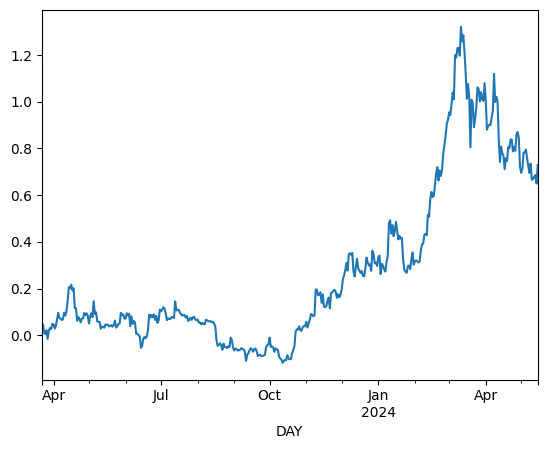

In [39]:
historical_cumulative_return = weighted_daily_returns['cumulative_return']
historical_cumulative_return.plot()

In [40]:
combined_data = pivot_data.merge(pivot_assets, on='DAY', how='left')
combined_data.set_index('DAY', inplace=True)
combined_data

TOTAL_FILLED_BALANCE_ETH  TOTAL_FILLED_BALANCE_USDC  \
DAY                                                               
2023-03-22                  0.100000                   0.000000   
2023-03-23                  0.140000                   0.000000   
2023-03-24                  0.437000                   0.000000   
2023-03-25                  0.437000                   0.000000   
2023-03-26                  0.447000                   0.000000   
...                              ...                        ...   
2024-05-11                 11.047240                 270.659535   
2024-05-12                 11.062640                 270.659535   
2024-05-13                 11.090865                 270.659535   
2024-05-14                 11.126045                 270.659535   
2024-05-15                 11.230723                 270.659535   

            TOTAL_FILLED_BALANCE_WETH  DAILY_PRICE_ETH  DAILY_PRICE_USDC_x  \
DAY                                                                          
2023-03-22                     0.0000          1743.36            1.000000   
2023-03-23                     0.0000          1825.05            1.000000   
2023-03-24                     0.0000          1765.28            1.010000   
2023-03-25                     0.0000          1750.66            1.010000   
2023-03-26                     0.0000          1780.12            0.999827   
...                               ...              ...                 ...   
2024-05-11                     0.0019          2915.79            1.000000   
2024-05-12                     0.0019          2930.86            0.999977   
2024-05-13                     0.0019          2946.31            0.999938   
2024-05-14                     0.0019          2881.98            0.999893   
2024-05-15                     0.0019          3021.48            1.000000   

            DAILY_PRICE_WETH_x  TOTAL_VALUE_IN_USD_ETH  \
DAY                                                      
2023-03-22             1743.36              174.336000   
2023-03-23             1825.05              255.507000   
2023-03-24             1765.28              771.427360   
2023-03-25             1750.66              765.038420   
2023-03-26             1780.12              795.713640   
...                        ...                     ...   
2024-05-11             2915.79            32211.431920   
2024-05-12             2930.86            32423.049070   
2024-05-13             2946.31            32677.126458   
2024-05-14             2881.98            32065.039169   
2024-05-15             3021.48            33933.404930   

            TOTAL_VALUE_IN_USD_USDC  TOTAL_VALUE_IN_USD_WETH  COMPOSITION_ETH  \
DAY                                                                             
2023-03-22                 0.000000                 0.000000         1.000000   
2023-03-23                 0.000000                 0.000000         1.000000   
2023-03-24                 0.000000                 0.000000         1.000000   
2023-03-25                 0.000000                 0.000000         1.000000   
2023-03-26                 0.000000                 0.000000         1.000000   
...                             ...                      ...              ...   
2024-05-11               270.659535                 5.540001         0.991498   
2024-05-12               270.653310                 5.568634         0.991553   
2024-05-13               270.642754                 5.597989         0.991617   
2024-05-14               270.630574                 5.475762         0.991463   
2024-05-15               270.659535                 5.740812         0.991920   

            ...  DAILY_PRICE_RETH  DAILY_PRICE_RPL  DAILY_PRICE_RSR  \
DAY         ...                                                       
2023-03-22  ...       1943.193724        41.027989         0.004101   
2023-03-23  ...       1978.132073        40.578442         0.004150   
2023-03-24  ...       1952.63336

In [41]:
portfolio = combined_data[[col for col in combined_data.columns if 'COMPOSITION_' in col]]
asset_prices = combined_data[[col for col in combined_data.columns if 'DAILY_PRICE_' in col]]
print(portfolio)
print(asset_prices)

            COMPOSITION_ETH  COMPOSITION_USDC  COMPOSITION_WETH
DAY                                                            
2023-03-22         1.000000          0.000000          0.000000
2023-03-23         1.000000          0.000000          0.000000
2023-03-24         1.000000          0.000000          0.000000
2023-03-25         1.000000          0.000000          0.000000
2023-03-26         1.000000          0.000000          0.000000
...                     ...               ...               ...
2024-05-11         0.991498          0.008331          0.000171
2024-05-12         0.991553          0.008277          0.000170
2024-05-13         0.991617          0.008213          0.000170
2024-05-14         0.991463          0.008368          0.000169
2024-05-15         0.991920          0.007912          0.000168

[421 rows x 3 columns]
            DAILY_PRICE_ETH  DAILY_PRICE_USDC_x  DAILY_PRICE_WETH_x  \
DAY                                                                   
20

## MVO Rebalancing

In [42]:
panama_dao_start_date = panamadao_returns['DAY'].iloc[0]
panama_dao_start_date

Timestamp('2023-03-22 00:00:00')

In [43]:
combined_all_assets

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-01-22         89.229891         0.006462         7.091551   
2023-01-23         87.993423         0.006462         7.049982   
2023-01-24         88.413674         0.006462         7.049390   
2023-01-25         86.696939         0.006462         6.901535   
2023-01-26         89.306431         0.006462         7.041247   
...                      ...              ...              ...   
2024-05-11         84.353048         1.007766         3.449942   
2024-05-12         83.737894         1.008633         3.441141   
2024-05-13         85.203764         0.999418         3.473348   
2024-05-14         82.783720         0.983932         3.432494   
2024-05-15         86.210000         0.992608         3.490000   

            DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                                
2023-01-22          0.027577          0.014806         77.805422   
2023-01-23          0.027577          0.017209         77.805422   
2023-01-24          0.027577          0.017558         77.805422   
2023-01-25          0.027577          0.016392         77.805422   
2023-01-26          0.027577          0.016868         77.805422   
...                      ...               ...               ...   
2024-05-11          0.023292          0.027483         58.929717   
2024-05-12          0.023323          0.027120         59.086085   
2024-05-13          0.023323          0.025813         59.871260   
2024-05-14          0.023366          0.025224         59.248416   
2024-05-15          0.023412          0.026470         60.660000   

            DAILY_PRICE_COMP  DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  \
DAY                                                                
2023-01-22         53.171666         463.184016        86.044910   
2023-01-23         53.748008         465.045274        85.159956   
2023-01-24         53.245861         465.620190        85.054341   
2023-01-25         51.354143         473.396814        81.843666   
2023-01-26         54.953221         468.150264        83.765201   
...                      ...                ...              ...   
2024-05-11         54.356222        1228.786830        96.341420   
2024-05-12         55.686127        1237.066091        97.804624   
2024-05-13         57.581433        1266.599091        97.481665   
2024-05-14         54.628907        1262.152502        92.418617   
2024-05-15         56.280000        1328.820000        96.310000   

            DAILY_PRICE_ENS  ...  COMPOSITION_STG  COMPOSITION_BAL  \
DAY                          ...                                     
2023-01-22        15.040093  ...              0.0              0.0   
2023-01-23        15.217766  ...              0.0              0.0   
2023-01-24        15.122363  ...              0.0              0.0   
2023-01-25        14.732804  ...              0.0              0.0   
2023-01-26        15.423502  ...              0.0              0.0   
...                     ...  ...              ...              ...   
2024-05-11        14.196615  ...              0.0              0.0   
2024-05-12        14.055241  ...              0.0              0.0   
2024-05-13        14.052114  ...              0.0              0.0   
2024-05-14        13.846131  ...              0.0              0.0   
2024-05-15        14.420000  ...              0.0              0.0   

            COMPOSITION_RPL  COMPOSITION_SOL  COMPOSITION_MKR  \
DAY                                                             
2023-01-22              0.0              0.0              0.0   
2023-01-23              0.0              0.0              0.0   
2023-01-24              0.0              0.0              0.0   
2023-01-25              0.0              0.0              0.0   
2023-01-26              0.0              0.0              0.0   
...              

In [44]:
combined_all_assets['COMPOSITION_ETH']

DAY
2023-01-22         NaN
2023-01-23         NaN
2023-01-24         NaN
2023-01-25         NaN
2023-01-26         NaN
                ...   
2024-05-11    0.991498
2024-05-12    0.991553
2024-05-13    0.991617
2024-05-14    0.991463
2024-05-15    0.991920
Name: COMPOSITION_ETH, Length: 480, dtype: float64

In [45]:
all_assets = assets['SYMBOL'].unique()

start_data = combined_all_assets[combined_all_assets.index >= panama_dao_start_date]
composition_columns = [f'COMPOSITION_{asset}' for asset in all_assets]
starting_composition = start_data[composition_columns]


In [46]:
pivot_data_filtered.columns

Index(['DAILY_PRICE_ETH', 'DAILY_PRICE_USDC', 'DAILY_PRICE_WETH',
       'COMPOSITION_ETH', 'COMPOSITION_USDC', 'COMPOSITION_WETH'],
      dtype='object')

In [47]:
panama_dao_assets

array(['ETH', 'USDC', 'WETH'], dtype=object)

In [48]:
full_starting_composition = starting_composition.merge(pivot_data_filtered['COMPOSITION_ETH'], left_index=True, right_index=True)

In [49]:
full_starting_composition[['COMPOSITION_ETH', 'COMPOSITION_USDC', 'COMPOSITION_WETH']]

COMPOSITION_ETH  COMPOSITION_USDC  COMPOSITION_WETH
DAY                                                            
2023-03-22         1.000000          0.000000          0.000000
2023-03-23         1.000000          0.000000          0.000000
2023-03-24         1.000000          0.000000          0.000000
2023-03-25         1.000000          0.000000          0.000000
2023-03-26         1.000000          0.000000          0.000000
...                     ...               ...               ...
2024-05-11         0.991498          0.008331          0.000171
2024-05-12         0.991553          0.008277          0.000170
2024-05-13         0.991617          0.008213          0.000170
2024-05-14         0.991463          0.008368          0.000169
2024-05-15         0.991920          0.007912          0.000168

[421 rows x 3 columns]

In [50]:

print('all assets', all_assets)
print('panamadao assets', panama_dao_assets)

# Combine both arrays using np.concatenate and remove duplicates using np.unique
combined_assets = np.unique(np.concatenate((all_assets, panama_dao_assets)))

print('combined assets', combined_assets)
print('panamadao assets', panama_dao_assets)


all assets ['CDAI' 'HOP' 'COMP' 'USDC' 'RETH' 'G' 'GFI' 'WETH' 'WBTC' 'AAVE' 'FRAX'
 'CELR' 'WSTETH' 'CETH' 'PAXG' 'ENS' 'UNI' 'RSR' 'STG' 'BAL' 'RPL' 'SOL'
 'MKR' 'ARB' 'CWBTC' 'DPI' 'REN' 'MPL']
panamadao assets ['ETH' 'USDC' 'WETH']
combined assets ['AAVE' 'ARB' 'BAL' 'CDAI' 'CELR' 'CETH' 'COMP' 'CWBTC' 'DPI' 'ENS' 'ETH'
 'FRAX' 'G' 'GFI' 'HOP' 'MKR' 'MPL' 'PAXG' 'REN' 'RETH' 'RPL' 'RSR' 'SOL'
 'STG' 'UNI' 'USDC' 'WBTC' 'WETH' 'WSTETH']
panamadao assets ['ETH' 'USDC' 'WETH']


In [51]:
combined_all_assets['DAILY_PRICE_USDC'] = combined_all_assets['DAILY_PRICE_USDC'].clip(upper=1.15).apply(lambda x: 1 if x > 1 else x)

In [52]:
combined_all_assets['DAILY_PRICE_USDC'].describe()

count    480.000000
mean       0.999934
std        0.001314
min        0.971359
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: DAILY_PRICE_USDC, dtype: float64

In [53]:
combined_all_assets['DAILY_PRICE_ETH'] = combined_all_assets['DAILY_PRICE_WETH']

In [54]:
prices_all_assets = combined_all_assets[[f'DAILY_PRICE_{asset}' for asset in combined_assets]]
prices_all_assets.pct_change().describe()

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  DAILY_PRICE_CDAI  \
count        479.000000       479.000000       479.000000        479.000000   
mean           0.000648         1.624757        -0.001083         -0.000310   
std            0.038324        35.595633         0.028091          0.007539   
min           -0.166746        -0.696357        -0.136084         -0.164174   
25%           -0.019794        -0.018929        -0.013571          0.000000   
50%            0.000419         0.000000        -0.000053          0.000000   
75%            0.019192         0.014773         0.013131          0.000000   
max            0.303463       779.046055         0.113927          0.006552   

       DAILY_PRICE_CELR  DAILY_PRICE_CETH  DAILY_PRICE_COMP  \
count        479.000000        479.000000        479.000000   
mean           0.002248         -0.000359          0.001107   
std            0.045540          0.017007          0.045209   
min           -0.217344         -0.263817         -0.172645   
25%           -0.018536          0.000000         -0.018977   
50%            0.000418          0.000000         -0.000503   
75%            0.021928          0.000000          0.019485   
max            0.248469          0.084739          0.355099   

       DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  DAILY_PRICE_ENS  ...  \
count         479.000000       479.000000       479.000000  ...   
mean            0.002422         0.000779         0.000944  ...   
std             0.021157         0.032985         0.046689  ...   
min            -0.069465        -0.151386        -0.240631  ...   
25%            -0.005241        -0.015798        -0.018881  ...   
50%             0.000000         0.001413        -0.000839  ...   
75%             0.007747         0.018697         0.017186  ...   
max             0.109533         0.164077         0.379695  ...   

       DAILY_PRICE_RETH  DAILY_PRICE_RPL  DAILY_PRICE_RSR  DAILY_PRICE_SOL  \
count        479.000000       479.000000       479.000000       479.000000   
mean           0.001637        -0.000277         0.002535         0.005592   
std            0.024812         0.042725         0.060083         0.061781   
min           -0.181900        -0.171851        -0.227425        -0.479572   
25%           -0.007874        -0.022522        -0.020726        -0.021019   
50%           -0.000226        -0.003977         0.000577        -0.000416   
75%            0.010539         0.012465         0.022459         0.027347   
max            0.131105         0.230201         0.522604         0.806360   

       DAILY_PRICE_STG  DAILY_PRICE_UNI  DAILY_PRICE_USDC  DAILY_PRICE_WBTC  \
count       479.000000       479.000000        479.000000        479.000000   
mean          0.000179         0.001805          0.000002          0.002437   
std           0.047008         0.059160          0.001794          0.022141   
min          -0.204118        -0.402576         -0.025678         -0.078086   
25%          -0.021857        -0.020583          0.000000         -0.006851   
50%          -0.002013         0.000439          0.000000          0.000156   
75%           0.020456         0.020102          0.000000          0.010061   
max           0.290171         0.530659          0.029486          0.133399   

       DAILY_PRICE_WETH  DAILY_PRICE_WSTETH  
count        479.000000          479.000000  
mean           0.001506            0.001625  
std            0.022518            0.022731  
min           -0.071239           -0.074327  
25%           -0.008757           -0.008198  
50%           -0.000553           -0.000711  
75%            0.011792            0.011512  
max            0.084998            0.086738  

[8 rows x 29 columns]

In [55]:
assets_to_drop = ['G', 'HOP','CELR','CDAI','CETH','REN','STG','AAVE','FRAX','MPL','RSR','BAL','ARB','ENS']
mvo_combined_assets = np.array([asset for asset in combined_assets if asset not in assets_to_drop])

mvo_combined_assets

array(['COMP', 'CWBTC', 'DPI', 'ETH', 'GFI', 'MKR', 'PAXG', 'RETH', 'RPL',
       'SOL', 'UNI', 'USDC', 'WBTC', 'WETH', 'WSTETH'], dtype='<U6')

In [56]:
iniital_composition = full_starting_composition.iloc[0]
latest_composition = full_starting_composition.iloc[-1]

<Axes: ylabel='2024-05-15 00:00:00'>

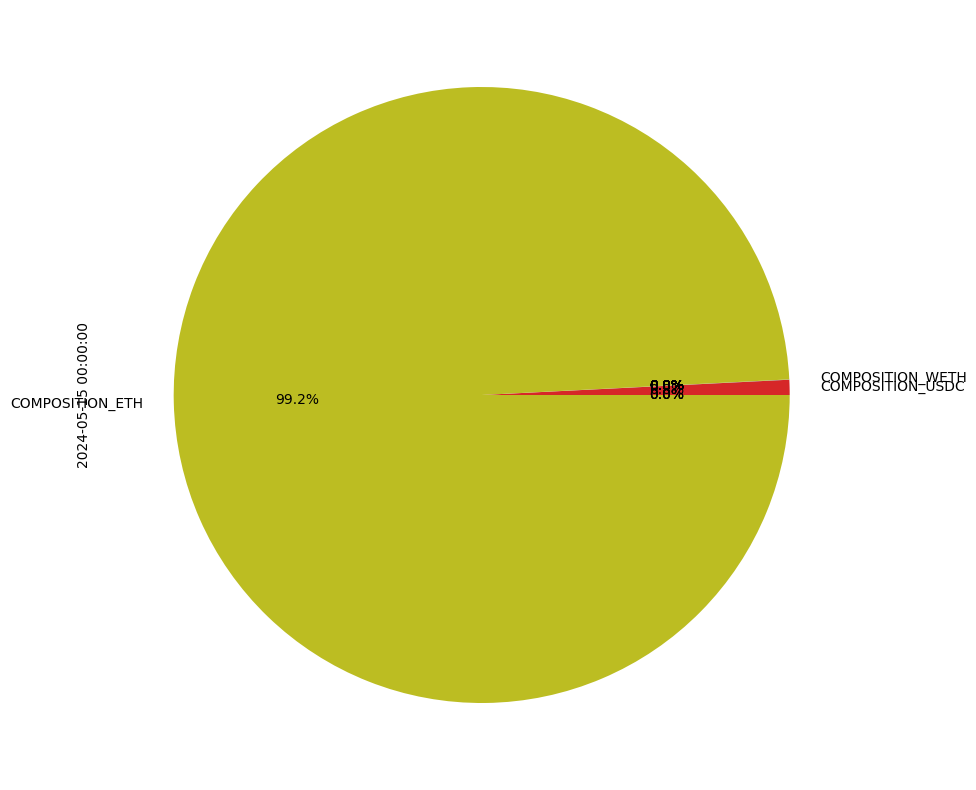

In [57]:
latest_composition.plot.pie(figsize=(10, 10), autopct='%1.1f%%')

<Axes: ylabel='2023-03-22 00:00:00'>

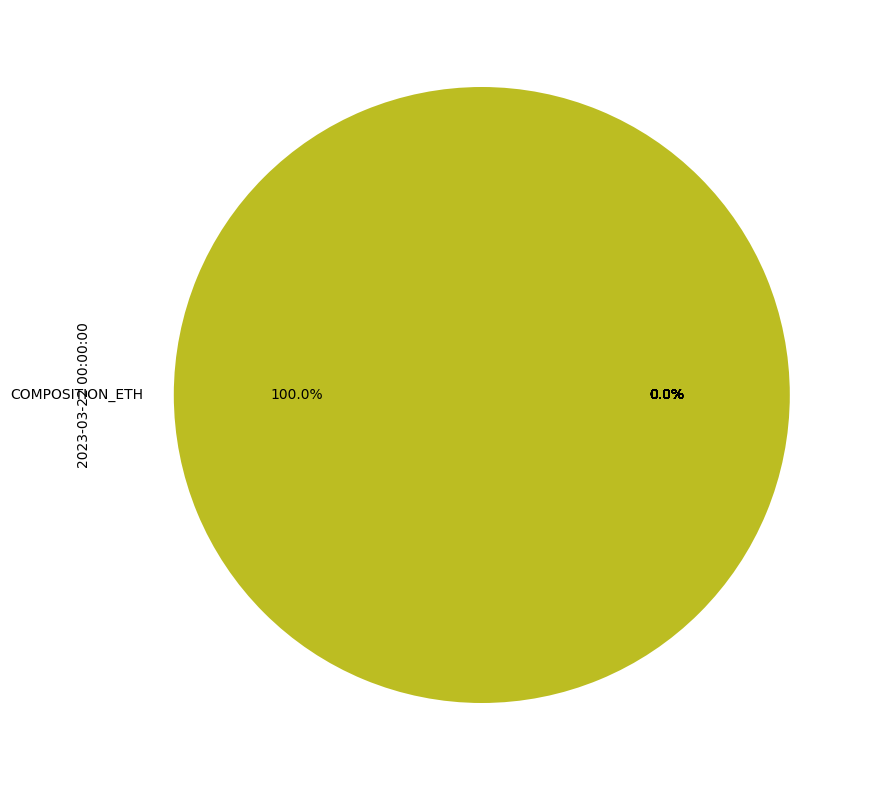

In [58]:
iniital_composition.plot.pie(figsize=(10, 10), autopct='%1.1f%%')

In [59]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('notebook', {
    'NotebookApp': {
        'iopub_data_rate_limit': 10000000
    }
})


{'NotebookApp': {'iopub_data_rate_limit': 10000000}}

In [60]:
starting_row = combined_all_assets[combined_all_assets.index >= panama_dao_start_date].iloc[0]

In [61]:
starting_row[[f'COMPOSITION_{asset}' for asset in mvo_combined_assets]]

COMPOSITION_COMP      0.0
COMPOSITION_CWBTC     0.0
COMPOSITION_DPI       0.0
COMPOSITION_ETH       1.0
COMPOSITION_GFI       0.0
COMPOSITION_MKR       0.0
COMPOSITION_PAXG      0.0
COMPOSITION_RETH      0.0
COMPOSITION_RPL       0.0
COMPOSITION_SOL       0.0
COMPOSITION_UNI       0.0
COMPOSITION_USDC      0.0
COMPOSITION_WBTC      0.0
COMPOSITION_WETH      0.0
COMPOSITION_WSTETH    0.0
Name: 2023-03-22 00:00:00, dtype: float64

In [62]:
import cvxpy as cp
import numpy as np
import pandas as pd

threshold = 1e-5  # Define a very small threshold for significant changes in weights

def calculate_sortino_ratio(returns, risk_free=current_risk_free):
    print("from",returns.index.min())
    print('through', returns.index.max())
    print('returns', returns.tail())
    # Calculate daily risk-free rate
    daily_risk_free_rate = (1 + risk_free) ** (1/365) - 1

    # Calculate excess returns
    excess_returns = returns - daily_risk_free_rate

    # Calculate downside returns
    downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
    daily_downside_deviation = np.sqrt(downside_returns.mean())

    # Handle NaN downside risk
    if np.isnan(daily_downside_deviation):
        daily_downside_deviation = 0.0

    # Compounding returns and annualizing based on the actual days with data
    active_days = returns.notna().sum()  # Using actual days with returns
    annual_factor = 365 / active_days
    compounding_return = (1 + excess_returns).prod() ** annual_factor - 1

    # Annual downside deviation
    annual_downside_deviation = daily_downside_deviation * np.sqrt(365)

    # Calculate Sortino ratios
    sortino_ratio = compounding_return / annual_downside_deviation if annual_downside_deviation != 0 else 0.0
    print('sortino ratio', sortino_ratio)

    return sortino_ratio

def mvo_sortino(returns, sortino_ratios, eth_index):
    n = returns.shape[1]
    weights = cp.Variable(n)
    portfolio_return = returns @ weights
    sortino_matrix = np.tile(sortino_ratios.values.reshape(1, -1), (len(returns), 1))
    portfolio_risk = cp.norm(returns - cp.multiply(sortino_matrix, cp.reshape(weights, (1, n))), 'fro')
    objective = cp.Maximize(cp.sum(portfolio_return))
    
    # Set constraints
    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights <= 0.3
    ]
    
    # Ensure at least 20% allocation to ETH
    constraints.append(weights[eth_index] >= 0.2)
    
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.CLARABEL)
    return weights.value

def rebalance_portfolio(data, weights):
    compositions = np.outer(np.ones(len(data)), weights)
    return compositions

def calculate_daily_portfolio_returns(data, all_assets):
    daily_returns = data[[f'DAILY_PRICE_{asset}' for asset in all_assets]].pct_change().dropna()
    composition_columns = [f'COMPOSITION_{asset}' for asset in all_assets]
    daily_returns.columns = composition_columns
    daily_portfolio_returns = (daily_returns * data[composition_columns].shift(1).fillna(0)).sum(axis=1)
    return daily_portfolio_returns

def calculate_cumulative_return(daily_portfolio_returns, start_date):
    daily_portfolio_returns = daily_portfolio_returns[daily_portfolio_returns.index >= start_date]
    cumulative_return = (1 + daily_portfolio_returns).cumprod() - 1
    return cumulative_return

def rebalance(data, all_assets, rebalancing_frequency=7):
    data = data.sort_index()
    rebalanced_data = data.copy()
    
    initial_composition = rebalanced_data[rebalanced_data.index >= panama_dao_start_date].iloc[0][[f'COMPOSITION_{asset}' for asset in all_assets]].values
    current_composition = initial_composition.copy()

    start_date = panama_dao_start_date

    # Find the index of the start date in the data
    start_index = data.index.get_loc(start_date)

    # Find the index of ETH in the all_assets array
    eth_index = np.where(all_assets == 'ETH')[0][0]

    for start in range(start_index, len(data)):
        end = start + 1
        period_data = data[start:end]
        
        if start % rebalancing_frequency == 0 and start != start_index:
            historical_returns = data[:start][[f'DAILY_PRICE_{asset}' for asset in all_assets]].pct_change().dropna()

            if historical_returns.shape[0] == 0 or historical_returns.shape[1] == 0:
                print(f"No returns available for historical period up to {start}")
                continue

            sortino_ratios = historical_returns.apply(calculate_sortino_ratio)

            if sortino_ratios.isnull().any():
                print(f"Sortino ratios contain NaN for historical period up to {start}")
                continue

            optimal_weights = mvo_sortino(historical_returns.values, sortino_ratios, eth_index)

            # Convert weights to standard notation for readability
            current_composition = np.round(current_composition, decimals=10)
            optimal_weights = np.round(optimal_weights, decimals=10)

            # Apply threshold to significant changes only
            weight_changes = np.abs(current_composition - optimal_weights)
            significant_changes = weight_changes >= threshold

            print(f"Period {start} to {end}:")
            print(f"  Current composition: {[f'{weight:.10f}' for weight in current_composition]}")
            print(f"  Optimal weights: {[f'{weight:.10f}' for weight in optimal_weights]}")
            print(f"  Weight changes: {[f'{change:.10f}' for change in weight_changes]}")


            if np.any(significant_changes):
                current_composition[significant_changes] = optimal_weights[significant_changes]

                # Normalize weights to ensure they sum to 1
                current_composition /= current_composition.sum()

        else:
            # Apply price changes to the current composition
            current_prices = data.iloc[start][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
            previous_prices = data.iloc[start-1][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
            current_composition = (current_composition * (current_prices / previous_prices))
            print('current_comp w/ price change', current_composition)
            current_composition /= current_composition.sum()
            print('normalized current_comp w/ price change', current_composition)

        rebalanced_data.loc[period_data.index, [f'COMPOSITION_{asset}' for asset in all_assets]] = current_composition
    
    rebalanced_data = rebalanced_data.iloc[:-1]
    
    return rebalanced_data

# Assuming combined_all_assets is already loaded and processed
all_assets = mvo_combined_assets

# Set rebalancing frequency (e.g., 1 for daily, 7 for weekly, 30 for monthly)
rebalancing_frequency = 1  # Change this to the desired frequency

# Perform rebalancing using MVO with Sortino ratio target
rebalanced_data = rebalance(combined_all_assets, all_assets, rebalancing_frequency)

# Calculate daily portfolio returns with rebalancing costs
mvo_daily_portfolio_returns = calculate_daily_portfolio_returns(rebalanced_data, all_assets)

# Calculate cumulative return for the rebalanced data from the panama_dao_start_date
cumulative_return = calculate_cumulative_return(mvo_daily_portfolio_returns, panama_dao_start_date)

# Print the first few rows of the rebalanced data and cumulative return to verify
print(rebalanced_data.head())
print(rebalanced_data.tail())

# Prepare base return
base_return = cumulative_return.reset_index()
base_return.columns = ['DAY', 'base_cumulative_return']

# Normalize returns
first_value = base_return['base_cumulative_return'].iloc[0]
base_return['PanamaDAO_treasury_return'] = 100 + (100 * (base_return['base_cumulative_return'] - first_value))

# Final output
normalized_returns = base_return[['DAY', 'PanamaDAO_treasury_return']]
normalized_returns.set_index('DAY', inplace=True)

# Print the first few rows of normalized returns
print(normalized_returns.head())


current_comp w/ price change [0.         0.         0.         0.99298123 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
normalized current_comp w/ price change [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
from 2023-01-23 00:00:00
through 2023-03-22 00:00:00
returns DAY
2023-03-18    0.033894
2023-03-19   -0.012256
2023-03-20   -0.013203
2023-03-21   -0.019300
2023-03-22   -0.000103
Name: DAILY_PRICE_COMP, dtype: float64
sortino ratio -1.0646032839296533
from 2023-01-23 00:00:00
through 2023-03-22 00:00:00
returns DAY
2023-03-18    0.001148
2023-03-19    0.024132
2023-03-20    0.002340
2023-03-21    0.001058
2023-03-22    0.009878
Name: DAILY_PRICE_CWBTC, dtype: float64
sortino ratio 8.863217352905256
from 2023-01-23 00:00:00
through 2023-03-22 00:00:00
returns DAY
2023-03-18    0.048888
2023-03-19   -0.020701
2023-03-20   -0.003683
2023-03-21   -0.012946
2023-03-22   -0.001180
Name: DAILY_PRICE_DPI, dtype: float64
sortino 

In [63]:
rebalanced_data
# Define a threshold
threshold = 1e-5

# Replace values below the threshold with 0
cleaned_rebalanced_data = rebalanced_data.applymap(lambda x: 0 if abs(x) < threshold else x)
cleaned_rebalanced_data

C:\Users\brand\AppData\Local\Temp\ipykernel_18364\1339587447.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_rebalanced_data = rebalanced_data.applymap(lambda x: 0 if abs(x) < threshold else x)


DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-01-22         89.229891         0.006462         7.091551   
2023-01-23         87.993423         0.006462         7.049982   
2023-01-24         88.413674         0.006462         7.049390   
2023-01-25         86.696939         0.006462         6.901535   
2023-01-26         89.306431         0.006462         7.041247   
...                      ...              ...              ...   
2024-05-10         90.549157         1.050244         3.614600   
2024-05-11         84.353048         1.007766         3.449942   
2024-05-12         83.737894         1.008633         3.441141   
2024-05-13         85.203764         0.999418         3.473348   
2024-05-14         82.783720         0.983932         3.432494   

            DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                                
2023-01-22          0.027577          0.014806         77.805422   
2023-01-23          0.027577          0.017209         77.805422   
2023-01-24          0.027577          0.017558         77.805422   
2023-01-25          0.027577          0.016392         77.805422   
2023-01-26          0.027577          0.016868         77.805422   
...                      ...               ...               ...   
2024-05-10          0.023315          0.028382         61.361606   
2024-05-11          0.023292          0.027483         58.929717   
2024-05-12          0.023323          0.027120         59.086085   
2024-05-13          0.023323          0.025813         59.871260   
2024-05-14          0.023366          0.025224         59.248416   

            DAILY_PRICE_COMP  DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  \
DAY                                                                
2023-01-22         53.171666         463.184016        86.044910   
2023-01-23         53.748008         465.045274        85.159956   
2023-01-24         53.245861         465.620190        85.054341   
2023-01-25         51.354143         473.396814        81.843666   
2023-01-26         54.953221         468.150264        83.765201   
...                      ...                ...              ...   
2024-05-10         58.618193        1272.397406        98.220946   
2024-05-11         54.356222        1228.786830        96.341420   
2024-05-12         55.686127        1237.066091        97.804624   
2024-05-13         57.581433        1266.599091        97.481665   
2024-05-14         54.628907        1262.152502        92.418617   

            DAILY_PRICE_ENS  ...  COMPOSITION_BAL  COMPOSITION_RPL  \
DAY                          ...                                     
2023-01-22        15.040093  ...                0              0.0   
2023-01-23        15.217766  ...                0              0.0   
2023-01-24        15.122363  ...                0              0.0   
2023-01-25        14.732804  ...                0              0.0   
2023-01-26        15.423502  ...                0              0.0   
...                     ...  ...              ...              ...   
2024-05-10        14.717558  ...                0              0.0   
2024-05-11        14.196615  ...                0              0.0   
2024-05-12        14.055241  ...                0              0.0   
2024-05-13        14.052114  ...                0              0.0   
2024-05-14        13.846131  ...                0              0.0   

            COMPOSITION_SOL  COMPOSITION_MKR  COMPOSITION_ARB  \
DAY                                                             
2023-01-22              0.0              0.0                0   
2023-01-23              0.0              0.0                0   
2023-01-24              0.0              0.0                0   
2023-01-25              0.0              0.0                0   
2023-01-26              0.0              0.0                0   
...              

In [64]:
mvo_daily_portfolio_returns

DAY
2023-01-22    0.000000
2023-01-23    0.000000
2023-01-24    0.000000
2023-01-25    0.000000
2023-01-26    0.000000
                ...   
2024-05-10    0.041747
2024-05-11   -0.030431
2024-05-12    0.003131
2024-05-13   -0.000397
2024-05-14   -0.012959
Length: 479, dtype: float64

In [65]:
mvo_daily_portfolio_returns = mvo_daily_portfolio_returns[mvo_daily_portfolio_returns.index >= panama_dao_start_date]

In [66]:
mvo_daily_portfolio_returns.max()

0.11353361942762455

In [67]:
sortino(mvo_daily_portfolio_returns)

Sortino Ratio: 2.7001952852858953


2.7001952852858953

Cumulative Return:
 DAY
2023-03-22    0.000000
2023-03-23    0.015799
2023-03-24   -0.036434
2023-03-25   -0.066380
2023-03-26   -0.056284
dtype: float64
Cumulative Return:
 DAY
2024-05-10    2.488844
2024-05-11    2.382676
2024-05-12    2.393267
2024-05-13    2.391920
2024-05-14    2.347964
dtype: float64


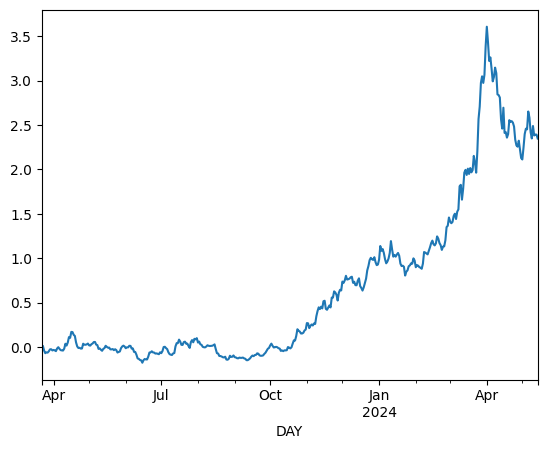

In [68]:
print("Cumulative Return:\n", cumulative_return.head())
print("Cumulative Return:\n", cumulative_return.tail())
cumulative_return.plot()

mvo_cumulative_return = cumulative_return.copy()

Normalized Returns:
             PanamaDAO_treasury_return
DAY                                  
2023-03-22                 100.000000
2023-03-23                 101.579911
2023-03-24                  96.356580
2023-03-25                  93.362044
2023-03-26                  94.371628
Normalized Returns:
             PanamaDAO_treasury_return
DAY                                  
2024-05-10                 348.884381
2024-05-11                 338.267608
2024-05-12                 339.326654
2024-05-13                 339.192036
2024-05-14                 334.796442


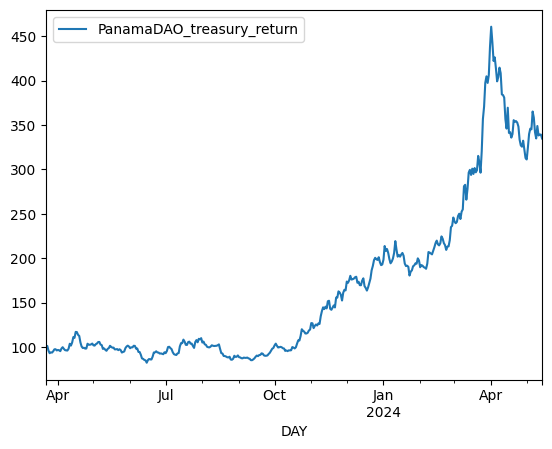

In [69]:
print("Normalized Returns:\n", normalized_returns.head())
print("Normalized Returns:\n", normalized_returns.tail())
normalized_returns.plot()

mvo_normalized_returns = normalized_returns.copy()

In [70]:
composition_columns = [f'COMPOSITION_{asset}' for asset in mvo_combined_assets]
mvo_comp = rebalanced_data[composition_columns]
mvo_comp

COMPOSITION_COMP  COMPOSITION_CWBTC  COMPOSITION_DPI  \
DAY                                                                
2023-01-22      0.000000e+00       0.000000e+00              0.0   
2023-01-23      0.000000e+00       0.000000e+00              0.0   
2023-01-24      0.000000e+00       0.000000e+00              0.0   
2023-01-25      0.000000e+00       0.000000e+00              0.0   
2023-01-26      0.000000e+00       0.000000e+00              0.0   
...                      ...                ...              ...   
2024-05-10      3.100000e-09       6.000000e-10              0.0   
2024-05-11      3.100000e-09       6.000000e-10              0.0   
2024-05-12      3.100000e-09       6.000000e-10              0.0   
2024-05-13      3.100000e-09       6.000000e-10              0.0   
2024-05-14      3.100000e-09       6.000000e-10              0.0   

            COMPOSITION_ETH  COMPOSITION_GFI  COMPOSITION_MKR  \
DAY                                                             
2023-01-22              NaN              0.0              0.0   
2023-01-23              NaN              0.0              0.0   
2023-01-24              NaN              0.0              0.0   
2023-01-25              NaN              0.0              0.0   
2023-01-26              NaN              0.0              0.0   
...                     ...              ...              ...   
2024-05-10              0.2              0.3              0.2   
2024-05-11              0.2              0.3              0.2   
2024-05-12              0.2              0.3              0.2   
2024-05-13              0.2              0.3              0.2   
2024-05-14              0.2              0.3              0.2   

            COMPOSITION_PAXG  COMPOSITION_RETH  COMPOSITION_RPL  \
DAY                                                               
2023-01-22               0.0      0.000000e+00     0.000000e+00   
2023-01-23               0.0      0.000000e+00     0.000000e+00   
2023-01-24               0.0      0.000000e+00     0.000000e+00   
2023-01-25               0.0      0.000000e+00     0.000000e+00   
2023-01-26               0.0      0.000000e+00     0.000000e+00   
...                      ...               ...              ...   
2024-05-10               0.0      9.000000e-10     5.400000e-09   
2024-05-11               0.0      9.000000e-10     5.400000e-09   
2024-05-12               0.0      9.000000e-10     5.400000e-09   
2024-05-13               0.0      9.000000e-10     5.400000e-09   
2024-05-14               0.0      9.000000e-10     5.400000e-09   

            COMPOSITION_SOL  COMPOSITION_UNI  COMPOSITION_USDC  \
DAY                                                              
2023-01-22              0.0     0.000000e+00               NaN   
2023-01-23              0.0     0.000000e+00               NaN   
2023-01-24              0.0     0.000000e+00               NaN   
2023-01-25              0.0     0.000000e+00               NaN   
2023-01-26              0.0     0.000000e+00               NaN   
...                     ...              ...               ...   
2024-05-10              0.3     3.000000e-10               0.0   
2024-05-11              0.3     3.000000e-10               0.0   
2024-05-12              0.3     3.000000e-10               0.0   
2024-05-13              0.3     3.000000e-10               0.0   
2024-05-14              0.3     3.000000e-10               0.0   

            COMPOSITION_WBTC  COMPOSITION_WETH  COMPOSITION_WSTETH  
DAY                                                                 
2023-01-22               0.0               NaN                 0.0  
2023-01-23               0.0               NaN                 0.0  
2023-01-24               0.0               NaN                 0.0  
2023-01-25               0.0               NaN                 0.0  
2023-01-26               0.0               NaN                 0.0  
...                      ...               ...                 ... 

In [71]:
# Define a threshold
threshold = 1e-5

# Replace values below the threshold with 0
mvo_comp = mvo_comp.applymap(lambda x: 0 if abs(x) < threshold else x)
mvo_comp

C:\Users\brand\AppData\Local\Temp\ipykernel_18364\1323881994.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mvo_comp = mvo_comp.applymap(lambda x: 0 if abs(x) < threshold else x)


COMPOSITION_COMP  COMPOSITION_CWBTC  COMPOSITION_DPI  \
DAY                                                                
2023-01-22               0.0                0.0                0   
2023-01-23               0.0                0.0                0   
2023-01-24               0.0                0.0                0   
2023-01-25               0.0                0.0                0   
2023-01-26               0.0                0.0                0   
...                      ...                ...              ...   
2024-05-10               0.0                0.0                0   
2024-05-11               0.0                0.0                0   
2024-05-12               0.0                0.0                0   
2024-05-13               0.0                0.0                0   
2024-05-14               0.0                0.0                0   

            COMPOSITION_ETH  COMPOSITION_GFI  COMPOSITION_MKR  \
DAY                                                             
2023-01-22              NaN              0.0              0.0   
2023-01-23              NaN              0.0              0.0   
2023-01-24              NaN              0.0              0.0   
2023-01-25              NaN              0.0              0.0   
2023-01-26              NaN              0.0              0.0   
...                     ...              ...              ...   
2024-05-10              0.2              0.3              0.2   
2024-05-11              0.2              0.3              0.2   
2024-05-12              0.2              0.3              0.2   
2024-05-13              0.2              0.3              0.2   
2024-05-14              0.2              0.3              0.2   

            COMPOSITION_PAXG  COMPOSITION_RETH  COMPOSITION_RPL  \
DAY                                                               
2023-01-22                 0               0.0              0.0   
2023-01-23                 0               0.0              0.0   
2023-01-24                 0               0.0              0.0   
2023-01-25                 0               0.0              0.0   
2023-01-26                 0               0.0              0.0   
...                      ...               ...              ...   
2024-05-10                 0               0.0              0.0   
2024-05-11                 0               0.0              0.0   
2024-05-12                 0               0.0              0.0   
2024-05-13                 0               0.0              0.0   
2024-05-14                 0               0.0              0.0   

            COMPOSITION_SOL  COMPOSITION_UNI  COMPOSITION_USDC  \
DAY                                                              
2023-01-22              0.0              0.0               NaN   
2023-01-23              0.0              0.0               NaN   
2023-01-24              0.0              0.0               NaN   
2023-01-25              0.0              0.0               NaN   
2023-01-26              0.0              0.0               NaN   
...                     ...              ...               ...   
2024-05-10              0.3              0.0               0.0   
2024-05-11              0.3              0.0               0.0   
2024-05-12              0.3              0.0               0.0   
2024-05-13              0.3              0.0               0.0   
2024-05-14              0.3              0.0               0.0   

            COMPOSITION_WBTC  COMPOSITION_WETH  COMPOSITION_WSTETH  
DAY                                                                 
2023-01-22               0.0               NaN                   0  
2023-01-23               0.0               NaN                   0  
2023-01-24               0.0               NaN                   0  
2023-01-25               0.0               NaN                   0  
2023-01-26               0.0               NaN                   0  
...                      ...               ...                 ... 

In [72]:
mvo_comp.tail(50)
print(mvo_comp.columns)

Index(['COMPOSITION_COMP', 'COMPOSITION_CWBTC', 'COMPOSITION_DPI',
       'COMPOSITION_ETH', 'COMPOSITION_GFI', 'COMPOSITION_MKR',
       'COMPOSITION_PAXG', 'COMPOSITION_RETH', 'COMPOSITION_RPL',
       'COMPOSITION_SOL', 'COMPOSITION_UNI', 'COMPOSITION_USDC',
       'COMPOSITION_WBTC', 'COMPOSITION_WETH', 'COMPOSITION_WSTETH'],
      dtype='object')


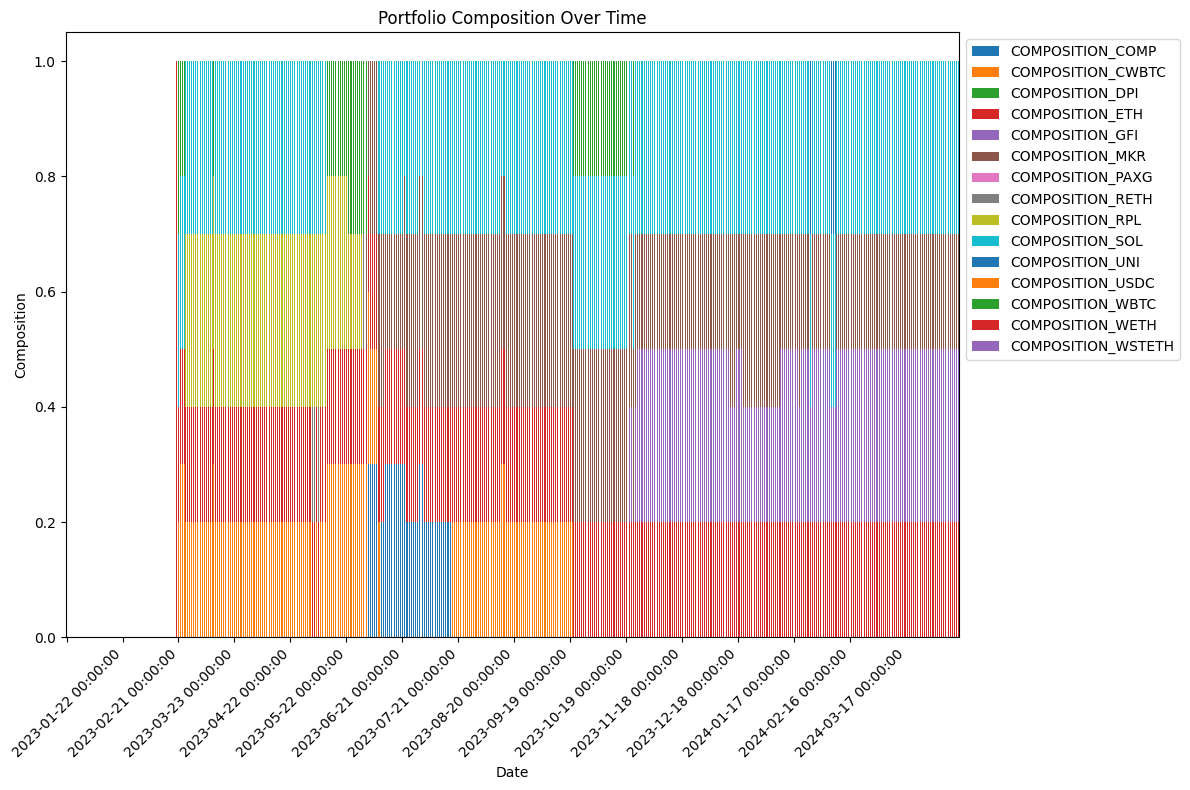

In [73]:
import matplotlib.pyplot as plt
# Plot the latest composition as a bar chart


# Plot the stacked bar chart
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

mvo_comp.plot(kind='bar', stacked=True, ax=ax)

# Improve the x-axis labels
plt.title('Portfolio Composition Over Time')
plt.xlabel('Date')
plt.ylabel('Composition')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks=range(0, len(pivot_data_filtered), 30), rotation=45)  # Show x-axis labels every 30 days
plt.tight_layout()
plt.show()

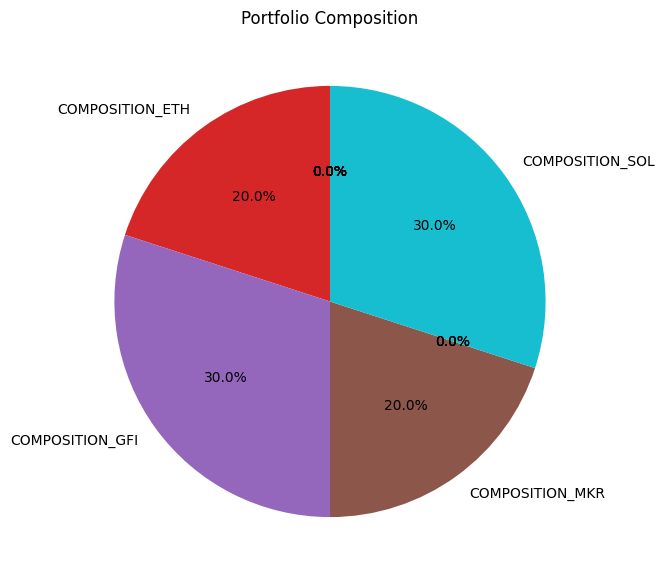

In [74]:
latest_comp_mvo = mvo_comp.iloc[-1]
# Plot the pie chart

def mvo_composition(): 
    plt.figure(figsize=(10, 7))
    latest_comp_mvo.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Portfolio Composition')
    plt.ylabel('')  # Hide the y-label
    return plt.show()
    
mvo_composition()

In [75]:
comp_columns = [col for col in pivot_data_filtered.columns if col.startswith('COMPOSITION_')]


latest_historical_comp = pivot_data_filtered[comp_columns].iloc[-2]

def historical_composition():
    plt.figure(figsize=(10, 7))
    latest_historical_comp.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Portfolio Composition')
    plt.ylabel('')  # Hide the y-label
    return plt.show()



## RL Rebalancing

In [76]:
combined_data1.isna().sum().sum()

0

## Trying all assets, historical sortinos

In [77]:
rl_combined_all_assets = combined_all_assets.fillna(0)

In [78]:
mvo_combined_assets

array(['COMP', 'CWBTC', 'DPI', 'ETH', 'GFI', 'MKR', 'PAXG', 'RETH', 'RPL',
       'SOL', 'UNI', 'USDC', 'WBTC', 'WETH', 'WSTETH'], dtype='<U6')

In [79]:
rl_combined_all_assets.iloc[0][[f'COMPOSITION_{asset}' for asset in combined_assets]]

COMPOSITION_AAVE      0.0
COMPOSITION_ARB       0.0
COMPOSITION_BAL       0.0
COMPOSITION_CDAI      0.0
COMPOSITION_CELR      0.0
COMPOSITION_CETH      0.0
COMPOSITION_COMP      0.0
COMPOSITION_CWBTC     0.0
COMPOSITION_DPI       0.0
COMPOSITION_ENS       0.0
COMPOSITION_ETH       0.0
COMPOSITION_FRAX      0.0
COMPOSITION_G         0.0
COMPOSITION_GFI       0.0
COMPOSITION_HOP       0.0
COMPOSITION_MKR       0.0
COMPOSITION_MPL       0.0
COMPOSITION_PAXG      0.0
COMPOSITION_REN       0.0
COMPOSITION_RETH      0.0
COMPOSITION_RPL       0.0
COMPOSITION_RSR       0.0
COMPOSITION_SOL       0.0
COMPOSITION_STG       0.0
COMPOSITION_UNI       0.0
COMPOSITION_USDC      0.0
COMPOSITION_WBTC      0.0
COMPOSITION_WETH      0.0
COMPOSITION_WSTETH    0.0
Name: 2023-01-22 00:00:00, dtype: float64

In [80]:
rl_combined_all_assets.iloc[0][[f'COMPOSITION_{asset}' for asset in all_assets]].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
combined_assets

array(['AAVE', 'ARB', 'BAL', 'CDAI', 'CELR', 'CETH', 'COMP', 'CWBTC',
       'DPI', 'ENS', 'ETH', 'FRAX', 'G', 'GFI', 'HOP', 'MKR', 'MPL',
       'PAXG', 'REN', 'RETH', 'RPL', 'RSR', 'SOL', 'STG', 'UNI', 'USDC',
       'WBTC', 'WETH', 'WSTETH'], dtype=object)

import gym
from gym import spaces
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from scipy.optimize import minimize, Bounds, LinearConstraint

def mvo(data, annual_risk_free_rate=0.05):
    try:
        portfolio = data[[f'COMPOSITION_{asset}' for asset in all_assets]]
        returns = portfolio.pct_change().fillna(0)
        total_portfolio_value = portfolio.sum(axis=1)
        composition = portfolio.divide(total_portfolio_value, axis=0)

        # Check for NaN or inf values in the data
        assert not returns.isnull().values.any(), "Returns contain NaN values"
        assert not np.isinf(returns).values.any(), "Returns contain inf values"

        daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/365) - 1
        excess_returns = returns - daily_risk_free_rate
        downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
        daily_downside_deviation = np.sqrt(downside_returns.mean())
        active_days = returns.notna().sum().max()
        annual_factor = 365 / active_days
        compounding_return = (1 + excess_returns).prod() ** annual_factor - 1
        annual_downside_deviation = daily_downside_deviation * np.sqrt(365)
        sortino_ratio = compounding_return / annual_downside_deviation

        def sortino_ratio_objective(weights):
            portfolio_returns = np.dot(returns, weights)
            excess_portfolio_returns = portfolio_returns - daily_risk_free_rate
            downside_portfolio_returns = np.where(excess_portfolio_returns < 0, excess_portfolio_returns**2, 0)
            portfolio_downside_deviation = np.sqrt(downside_portfolio_returns.mean())
            annual_portfolio_return = (1 + excess_portfolio_returns).prod() ** (365 / len(excess_portfolio_returns)) - 1
            portfolio_annual_downside_deviation = portfolio_downside_deviation * np.sqrt(365)
            return -annual_portfolio_return / portfolio_annual_downside_deviation

        # Ensure bounds match the number of assets
        num_assets = len(all_assets)
        bounds = Bounds([0.01] * num_assets, [0.5] * num_assets)
        constraints = LinearConstraint([1] * num_assets, [1], [1])
        options = {'verbose': 1, 'maxiter': 1000}

        result = minimize(sortino_ratio_objective, composition.mean().values, method='trust-constr',
                          bounds=bounds, constraints=constraints, options=options)

        if result.success:
            optimized_weights = result.x
            return optimized_weights, returns, composition, total_portfolio_value
        else:
            print("Optimization failed:", result.message)
            return None, None, None, None

    except Exception as e:
        print(f"Error during MVO computation: {e}")
        return None, None, None, None


def calculate_sortino_ratio(returns, risk_free=current_risk_free):
    returns = pd.Series(returns)  # Convert numpy array to pandas Series
    print("from", returns.index.min())
    print('through', returns.index.max())
    print('returns', returns.tail())
    # Calculate daily risk-free rate
    daily_risk_free_rate = (1 + risk_free) ** (1/365) - 1

    # Calculate excess returns
    excess_returns = returns - daily_risk_free_rate

    # Calculate downside returns
    downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
    daily_downside_deviation = np.sqrt(downside_returns.mean())

    # Handle NaN downside risk
    if np.isnan(daily_downside_deviation):
        daily_downside_deviation = 0.0

    # Compounding returns and annualizing based on the actual days with data
    active_days = returns.notna().sum()  # Using actual days with returns
    annual_factor = 365 / active_days
    compounding_return = (1 + excess_returns).prod() ** annual_factor - 1

    # Annual downside deviation
    annual_downside_deviation = daily_downside_deviation * np.sqrt(365)

    # Calculate Sortino ratios
    sortino_ratio = compounding_return / annual_downside_deviation if annual_downside_deviation != 0 else 0.0
    print('sortino ratio', sortino_ratio)

    return sortino_ratio

def normalize_portfolio(portfolio):
    total = np.sum(portfolio)
    if total != 0:
        return portfolio / total
    return portfolio

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_composition, rebalancing_frequency=7, start_date=None):
        super(PortfolioEnv, self).__init__()
        
        self.data = data
        self.num_assets = len([col for col in data.columns if 'DAILY_PRICE_' in col])
        self.initial_composition = initial_composition
        self.rebalancing_frequency = rebalancing_frequency
        self.start_date = start_date
        self.eth_index = np.where(all_assets == 'ETH')[0][0]  # Find the index of ETH in the all_assets array
        
        # Update the observation space to match the expected shape
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(2 * self.num_assets,), dtype=np.float32
        )
        
        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float32)
        
        self.actions_log = []
        self.returns_log = []
        self.composition_log = []
        self.reset()
    
    def reset(self):
        # Find the index of the start date in the data
        if self.start_date:
            self.current_step = self.data.index.get_loc(self.start_date)
        else:
            self.current_step = 0
        self.done = False
        self.portfolio = self.initial_composition
        self.actions_log = []
        self.returns_log = []
        self.composition_log = [self.portfolio.copy()]
        print(f"Environment reset. Initial composition: {self.portfolio}")
        return self._next_observation()
    
    def _next_observation(self):
        prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        obs = np.concatenate([self.portfolio, prices])
        print(f'portfolio: {self.portfolio}')
        print(f'prices: {prices}')
        print(f'obs: {obs}')
        return obs

    def step(self, action):
        if self.done or self.current_step >= len(self.data) - 1:
            self.done = True
            return self._next_observation(), 0, self.done, {}

        current_prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        prev_prices = self.data.iloc[self.current_step - 1][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values if self.current_step > 0 else current_prices

        # Apply daily price changes to the composition
        print(f"Step {self.current_step}: Applying daily price changes")
        print(f"Previous prices: {prev_prices}")
        print(f"Current prices: {current_prices}")
        print(f"Portfolio before price change: {self.portfolio}")

        # Calculate portfolio value change based on price changes
        new_portfolio_values = self.portfolio * (current_prices / prev_prices)
        sum_new_portfolio_values = np.sum(new_portfolio_values)
        print('new portfolio value', new_portfolio_values)
        print('sum of new port values', sum_new_portfolio_values)

        if sum_new_portfolio_values != 0:
            self.portfolio = new_portfolio_values / sum_new_portfolio_values
        else:
            self.portfolio = new_portfolio_values

        # Normalize the portfolio values to ensure the portfolio sums to 1
        self.portfolio = normalize_portfolio(new_portfolio_values)
        print(f"Portfolio after price change: {self.portfolio}")

        # Only update portfolio composition on rebalancing frequency
        if self.current_step % self.rebalancing_frequency == 0:
            action = np.clip(action, 0, 1)
            action_sum = np.sum(action)
            if action_sum == 0:
                action_sum = 1e-8

            action = action / action_sum
            print(f"Rebalancing step: {self.current_step}")
            print(f"Action taken: {action}")
            print(f"Portfolio before rebalancing: {self.portfolio}")

            self.portfolio = action
            self.actions_log.append(action)
            print(f"Portfolio after rebalancing: {self.portfolio}")

            # Enforce at least 20% allocation to ETH (using eth_index)
            if self.portfolio[self.eth_index] < 0.2:
                diff = 0.2 - self.portfolio[self.eth_index]
                remaining_allocation = 1 - 0.2

                self.portfolio[self.eth_index] = 0.2
                other_weights = np.delete(self.portfolio, self.eth_index)
                other_weights = other_weights / np.sum(other_weights) * remaining_allocation
                self.portfolio = np.insert(other_weights, self.eth_index, 0.2)

            print(f"Portfolio after enforcing ETH constraint: {self.portfolio}")

            # Normalize the portfolio to ensure the weights sum to 1
            self.portfolio = normalize_portfolio(self.portfolio)
            print(f"Normalized portfolio: {self.portfolio}")

        # Log the composition for each day after potential rebalancing
        self.composition_log.append(self.portfolio.copy())

        # Calculate the portfolio return
        portfolio_return = np.sum(((current_prices - prev_prices) / prev_prices) * self.portfolio)
        print('portfolio return', portfolio_return)

        self.returns_log.append(portfolio_return)

        # Calculate Sortino ratio
        if len(self.returns_log) > 1:
            sortino_ratio = calculate_sortino_ratio(np.array(self.returns_log))
            print('returns array', np.array(self.returns_log))
        else:
            sortino_ratio = 0

        optimized_weights, _, composition, _ = mvo(self.data.iloc[:self.current_step + 1])
        print('input for mvo', self.data.iloc[:self.current_step + 1])
        if optimized_weights is not None:
            current_weights = composition.iloc[-1].values
            max_distance = sum(abs(1 - value) for value in optimized_weights)
            distance_penalty = sum(abs(current_weights[i] - optimized_weights[i]) for i in range(len(optimized_weights))) / max_distance if max_distance != 0 else 0
        else:
            distance_penalty = 0

        # Debugging prints
        print(f"Step: {self.current_step}, Action: {action}, Portfolio Return: {portfolio_return}, Sortino Ratio: {sortino_ratio}, Distance Penalty: {distance_penalty}")
        reward = portfolio_return + 10 * sortino_ratio - distance_penalty 
        print('sortino ratio', sortino_ratio)
        print('reward', reward)  # Combining portfolio return and Sortino ratio
        obs = self._next_observation()
        self.current_step += 1
        return obs, reward, self.done, {}

def train_rl_agent(data, all_assets, rebalancing_frequency=7, start_date=None):
    initial_composition = data.iloc[data.index >= panama_dao_start_date][[f'COMPOSITION_{asset}' for asset in all_assets]].to_numpy()[0]  # Convert to numpy array
    print('initial columns',initial_composition)
    env = PortfolioEnv(data, initial_composition, rebalancing_frequency=rebalancing_frequency, start_date=start_date)
    model = PPO('MlpPolicy', env, verbose=1)
    
    total_timesteps = len(data)
    training_duration_factor = 500  # Example: extending the training duration
    total_timesteps *= training_duration_factor

    # Custom training loop
    obs = env.reset()
    for _ in range(total_timesteps):
        action, _ = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        if done:
            break

    # After training, access the logged actions, compositions, and rebalancing costs
    actions_log = env.actions_log
    returns_log = env.returns_log
    composition_log = env.composition_log
    
    # Creating DataFrames for actions, compositions, and returns
    actions_df = pd.DataFrame(actions_log, columns=[f'WEIGHT_{asset}' for asset in all_assets])
    actions_index = data.index[::env.rebalancing_frequency][:len(actions_log)]
    actions_df.index = actions_index

    composition_df = pd.DataFrame(composition_log, columns=[f'COMPOSITION_{asset}' for asset in all_assets])
    composition_df.index = data.index[:len(composition_log)]

    returns_df = pd.DataFrame(returns_log, columns=['Portfolio Return'])
    returns_df.index = data.index[:len(returns_log)]

    # Calculate portfolio returns
    prices_df = data.loc[data.index >= panama_dao_start_date, [f'DAILY_PRICE_{asset}' for asset in all_assets]]
    price_returns = prices_df.pct_change().fillna(0)
    price_returns.columns = composition_df.columns
    portfolio_values = (composition_df.values * price_returns.values).sum(axis=1)
    rl_portfolio_returns = pd.Series(portfolio_values, index=price_returns.index, name='Portfolio Value')
    rl_cumulative_return = (1 + rl_portfolio_returns).cumprod() - 1

    cumulative_return_df = rl_cumulative_return.reset_index()
    cumulative_return_df.columns = ['DAY', 'cumulative_return']

    # Prepare base return
    base_return = cumulative_return_df.dropna().rename(columns={'cumulative_return': 'base_cumulative_return'})

    # Combine results
    combined = base_return[['DAY', 'base_cumulative_return']].sort_values('DAY')

    # Normalize returns
    first_value = combined['base_cumulative_return'].iloc[0]
    combined['PanamaDAO_treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))

    # Final output
    rl_normalized_returns = combined[['DAY', 'PanamaDAO_treasury_return']]

    return actions_df, rl_portfolio_returns, rl_cumulative_return, rl_normalized_returns, composition_df, returns_df

# Usage example
rebalancing_frequency = 1

# Define all assets
all_assets = combined_assets

# Set the start date
start_date = panama_dao_start_date

# Train the RL agent and obtain the DataFrames
actions_df, rl_portfolio_returns, rl_cumulative_return, rl_normalized_returns, composition_df, returns_df = train_rl_agent(rl_combined_all_assets, all_assets, rebalancing_frequency, start_date)

# Display normalized returns
print(rl_normalized_returns.head())

# Display returns log
print(returns_df.head())


# Test

import gym
from gym import spaces
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from scipy.optimize import minimize, Bounds, LinearConstraint

def mvo(data, annual_risk_free_rate=0.05):
    try:
        portfolio = data[[f'COMPOSITION_{asset}' for asset in all_assets]]
        returns = portfolio.pct_change().fillna(0)
        total_portfolio_value = portfolio.sum(axis=1)
        composition = portfolio.divide(total_portfolio_value, axis=0)

        # Check for NaN or inf values in the data
        assert not returns.isnull().values.any(), "Returns contain NaN values"
        assert not np.isinf(returns).values.any(), "Returns contain inf values"

        daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/365) - 1
        excess_returns = returns - daily_risk_free_rate
        downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
        daily_downside_deviation = np.sqrt(downside_returns.mean())
        active_days = returns.notna().sum().max()
        annual_factor = 365 / active_days
        compounding_return = (1 + excess_returns).prod() ** annual_factor - 1
        annual_downside_deviation = daily_downside_deviation * np.sqrt(365)
        sortino_ratio = compounding_return / annual_downside_deviation

        def sortino_ratio_objective(weights):
            portfolio_returns = np.dot(returns, weights)
            excess_portfolio_returns = portfolio_returns - daily_risk_free_rate
            downside_portfolio_returns = np.where(excess_portfolio_returns < 0, excess_portfolio_returns**2, 0)
            portfolio_downside_deviation = np.sqrt(downside_portfolio_returns.mean())
            annual_portfolio_return = (1 + excess_portfolio_returns).prod() ** (365 / len(excess_portfolio_returns)) - 1
            portfolio_annual_downside_deviation = portfolio_downside_deviation * np.sqrt(365)
            return -annual_portfolio_return / portfolio_annual_downside_deviation

        # Ensure bounds match the number of assets
        num_assets = len(all_assets)
        bounds = Bounds([0.01] * num_assets, [0.5] * num_assets)
        constraints = LinearConstraint([1] * num_assets, [1], [1])
        options = {'verbose': 1, 'maxiter': 1000}

        result = minimize(sortino_ratio_objective, composition.mean().values, method='trust-constr',
                          bounds=bounds, constraints=constraints, options=options)

        if result.success:
            optimized_weights = result.x
            return optimized_weights, returns, composition, total_portfolio_value
        else:
            print("Optimization failed:", result.message)
            return None, None, None, None

    except Exception as e:
        print(f"Error during MVO computation: {e}")
        return None, None, None, None


def calculate_sortino_ratio(returns, risk_free=current_risk_free):
    returns = pd.Series(returns)  # Convert numpy array to pandas Series
    print("from", returns.index.min())
    print('through', returns.index.max())
    print('returns', returns.tail())
    # Calculate daily risk-free rate
    daily_risk_free_rate = (1 + risk_free) ** (1/365) - 1

    # Calculate excess returns
    excess_returns = returns - daily_risk_free_rate

    # Calculate downside returns
    downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
    daily_downside_deviation = np.sqrt(downside_returns.mean())

    # Handle NaN downside risk
    if np.isnan(daily_downside_deviation):
        daily_downside_deviation = 0.0

    # Compounding returns and annualizing based on the actual days with data
    active_days = returns.notna().sum()  # Using actual days with returns
    annual_factor = 365 / active_days
    compounding_return = (1 + excess_returns).prod() ** annual_factor - 1

    # Annual downside deviation
    annual_downside_deviation = daily_downside_deviation * np.sqrt(365)

    # Calculate Sortino ratios
    sortino_ratio = compounding_return / annual_downside_deviation if annual_downside_deviation != 0 else 0.0
    print('sortino ratio', sortino_ratio)

    return sortino_ratio

def normalize_portfolio(portfolio):
    total = np.sum(portfolio)
    if total != 0:
        return portfolio / total
    return portfolio

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_composition, rebalancing_frequency=7, start_date=None):
        super(PortfolioEnv, self).__init__()
        
        self.data = data
        self.num_assets = len([col for col in data.columns if 'DAILY_PRICE_' in col])
        self.initial_composition = initial_composition
        self.rebalancing_frequency = rebalancing_frequency
        self.start_date = start_date
        self.eth_index = np.where(all_assets == 'ETH')[0][0]  # Find the index of ETH in the all_assets array
        
        # Update the observation space to match the expected shape
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(2 * self.num_assets,), dtype=np.float32
        )
        
        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float32)
        
        self.actions_log = []
        self.returns_log = []
        self.composition_log = []
        self.reset()
    
    def reset(self):
        # Find the index of the start date in the data
        if self.start_date:
            self.current_step = self.data.index.get_loc(self.start_date)
        else:
            self.current_step = 0
        self.done = False
        self.portfolio = self.initial_composition
        self.actions_log = []
        self.returns_log = []
        self.composition_log = [self.portfolio.copy()]
        print(f"Environment reset. Initial composition: {self.portfolio}")
        return self._next_observation()
    
    def _next_observation(self):
        prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        obs = np.concatenate([self.portfolio, prices])
        print(f'portfolio: {self.portfolio}')
        print(f'prices: {prices}')
        print(f'obs: {obs}')
        return obs

    def step(self, action):
        if self.done or self.current_step >= len(self.data) - 1:
            self.done = True
            return self._next_observation(), 0, self.done, {}

        current_prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        prev_prices = self.data.iloc[self.current_step - 1][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values if self.current_step > 0 else current_prices

        # Apply daily price changes to the composition
        print(f"Step {self.current_step}: Applying daily price changes")
        print(f"Previous prices: {prev_prices}")
        print(f"Current prices: {current_prices}")
        print(f"Portfolio before price change: {self.portfolio}")

        # Calculate portfolio value change based on price changes
        new_portfolio_values = self.portfolio * (current_prices / prev_prices)
        sum_new_portfolio_values = np.sum(new_portfolio_values)
        print('new portfolio value', new_portfolio_values)
        print('sum of new port values', sum_new_portfolio_values)

        if sum_new_portfolio_values != 0:
            self.portfolio = new_portfolio_values / sum_new_portfolio_values
        else:
            self.portfolio = new_portfolio_values

        # Normalize the portfolio values to ensure the portfolio sums to 1
        self.portfolio = normalize_portfolio(new_portfolio_values)
        print(f"Portfolio after price change: {self.portfolio}")

        # Only update portfolio composition on rebalancing frequency
        if self.current_step % self.rebalancing_frequency == 0:
            action = np.clip(action, 0, 1)
            action_sum = np.sum(action)
            if action_sum == 0:
                action_sum = 1e-8

            action = action / action_sum
            print(f"Rebalancing step: {self.current_step}")
            print(f"Action taken: {action}")
            print(f"Portfolio before rebalancing: {self.portfolio}")

            self.portfolio = action
            self.actions_log.append(action)
            print(f"Portfolio after rebalancing: {self.portfolio}")

            # Enforce at least 20% allocation to ETH (using eth_index)
            if self.portfolio[self.eth_index] < 0.2:
                diff = 0.2 - self.portfolio[self.eth_index]
                remaining_allocation = 1 - 0.2

                self.portfolio[self.eth_index] = 0.2
                other_weights = np.delete(self.portfolio, self.eth_index)
                other_weights = other_weights / np.sum(other_weights) * remaining_allocation
                self.portfolio = np.insert(other_weights, self.eth_index, 0.2)

            print(f"Portfolio after enforcing ETH constraint: {self.portfolio}")

            # Normalize the portfolio to ensure the weights sum to 1
            self.portfolio = normalize_portfolio(self.portfolio)
            print(f"Normalized portfolio: {self.portfolio}")

        # Log the composition for each day after potential rebalancing
        self.composition_log.append(self.portfolio.copy())

        # Calculate total portfolio value before price change
        total_value_before = np.sum(self.portfolio * prev_prices)
        
        # Calculate total portfolio value after price change
        total_value_after = np.sum(self.portfolio * current_prices)
        
        
        
        
        # Calculate the portfolio return as the percentage change in total portfolio value
        portfolio_return = (total_value_after - total_value_before) / total_value_before
        print('portfolio return', portfolio_return)

        self.returns_log.append(portfolio_return)

        # Calculate Sortino ratio
        if len(self.returns_log) > 1:
            sortino_ratio = calculate_sortino_ratio(np.array(self.returns_log))
            print('returns array', np.array(self.returns_log))
        else:
            sortino_ratio = 0

        optimized_weights, _, composition, _ = mvo(self.data.iloc[:self.current_step + 1])
        print('input for mvo', self.data.iloc[:self.current_step + 1])
        if optimized_weights is not None:
            current_weights = composition.iloc[-1].values
            max_distance = sum(abs(1 - value) for value in optimized_weights)
            distance_penalty = sum(abs(current_weights[i] - optimized_weights[i]) for i in range(len(optimized_weights))) / max_distance if max_distance != 0 else 0
        else:
            distance_penalty = 0

        # Debugging prints
        print(f"Step: {self.current_step}, Action: {action}, Portfolio Return: {portfolio_return}, Sortino Ratio: {sortino_ratio}, Distance Penalty: {distance_penalty}")
        reward = portfolio_return + 10 * sortino_ratio - distance_penalty 
        print('sortino ratio', sortino_ratio)
        print('reward', reward)  # Combining portfolio return and Sortino ratio
        obs = self._next_observation()
        self.current_step += 1
        return obs, reward, self.done, {}

def train_rl_agent(data, all_assets, rebalancing_frequency=7, start_date=None):
    initial_composition = data.iloc[data.index >= panama_dao_start_date][[f'COMPOSITION_{asset}' for asset in all_assets]].to_numpy()[0]  # Convert to numpy array
    print('initial columns',initial_composition)
    env = PortfolioEnv(data, initial_composition, rebalancing_frequency=rebalancing_frequency, start_date=start_date)
    model = PPO('MlpPolicy', env, verbose=1)
    
    total_timesteps = len(data)
    training_duration_factor = 500  # Example: extending the training duration
    total_timesteps *= training_duration_factor

    # Custom training loop
    obs = env.reset()
    for _ in range(total_timesteps):
        action, _ = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        if done:
            break

    # After training, access the logged actions, compositions, and rebalancing costs
    actions_log = env.actions_log
    returns_log = env.returns_log
    composition_log = env.composition_log
    
    # Creating DataFrames for actions, compositions, and returns
    actions_df = pd.DataFrame(actions_log, columns=[f'WEIGHT_{asset}' for asset in all_assets])
    actions_index = data.index[::env.rebalancing_frequency][:len(actions_log)]
    actions_df.index = actions_index

    composition_df = pd.DataFrame(composition_log, columns=[f'COMPOSITION_{asset}' for asset in all_assets])
    composition_df.index = data.index[:len(composition_log)]

    returns_df = pd.DataFrame(returns_log, columns=['Portfolio Return'])
    returns_df.index = data.index[:len(returns_log)]

    # Calculate portfolio returns
    prices_df = data.loc[data.index >= panama_dao_start_date, [f'DAILY_PRICE_{asset}' for asset in all_assets]]
    price_returns = prices_df.pct_change().fillna(0)
    price_returns.columns = composition_df.columns
    portfolio_values = (composition_df.values * price_returns.values).sum(axis=1)
    print('portfolio values', portfolio_values)
    rl_portfolio_returns = pd.Series(portfolio_values, index=price_returns.index, name='Portfolio Value')
    rl_cumulative_return = (1 + rl_portfolio_returns).cumprod() - 1

    cumulative_return_df = rl_cumulative_return.reset_index()
    cumulative_return_df.columns = ['DAY', 'cumulative_return']

    # Prepare base return
    base_return = cumulative_return_df.dropna().rename(columns={'cumulative_return': 'base_cumulative_return'})

    # Combine results
    combined = base_return[['DAY', 'base_cumulative_return']].sort_values('DAY')

    # Normalize returns
    first_value = combined['base_cumulative_return'].iloc[0]
    combined['PanamaDAO_treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))

    # Final output
    rl_normalized_returns = combined[['DAY', 'PanamaDAO_treasury_return']]

    return actions_df, rl_portfolio_returns, rl_cumulative_return, rl_normalized_returns, composition_df, returns_df

# Usage example
rebalancing_frequency = 1

# Define all assets
all_assets = combined_assets

# Set the start date
start_date = panama_dao_start_date

# Train the RL agent and obtain the DataFrames
actions_df, rl_portfolio_returns, rl_cumulative_return, rl_normalized_returns, composition_df, returns_df = train_rl_agent(rl_combined_all_assets, all_assets, rebalancing_frequency, start_date)

# Display normalized returns
print(rl_normalized_returns.head())

# Display returns log
print(returns_df.head())


In [1]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from scipy.optimize import minimize, Bounds, LinearConstraint
import torch

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

def mvo(data, annual_risk_free_rate=0.05):
    try:
        portfolio = data[[f'COMPOSITION_{asset}' for asset in all_assets]]
        returns = portfolio.pct_change().fillna(0)
        total_portfolio_value = portfolio.sum(axis=1)
        composition = portfolio.divide(total_portfolio_value, axis=0)

        assert not returns.isnull().values.any(), "Returns contain NaN values"
        assert not np.isinf(returns).values.any(), "Returns contain inf values"

        daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/365) - 1
        excess_returns = returns - daily_risk_free_rate
        downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
        daily_downside_deviation = np.sqrt(downside_returns.mean())
        active_days = returns.notna().sum().max()
        annual_factor = 365 / active_days
        compounding_return = (1 + excess_returns).prod() ** annual_factor - 1
        annual_downside_deviation = daily_downside_deviation * np.sqrt(365)
        sortino_ratio = compounding_return / annual_downside_deviation

        def sortino_ratio_objective(weights):
            portfolio_returns = np.dot(returns, weights)
            excess_portfolio_returns = portfolio_returns - daily_risk_free_rate
            downside_portfolio_returns = np.where(excess_portfolio_returns < 0, excess_portfolio_returns**2, 0)
            portfolio_downside_deviation = np.sqrt(downside_portfolio_returns.mean())
            annual_portfolio_return = (1 + excess_portfolio_returns).prod() ** (365 / len(excess_portfolio_returns)) - 1
            portfolio_annual_downside_deviation = portfolio_downside_deviation * np.sqrt(365)
            return -annual_portfolio_return / portfolio_annual_downside_deviation

        num_assets = len(all_assets)
        bounds = Bounds([0.01] * num_assets, [0.5] * num_assets)
        constraints = LinearConstraint([1] * num_assets, [1], [1])
        options = {'verbose': 1, 'maxiter': 1000}

        result = minimize(sortino_ratio_objective, composition.mean().values, method='trust-constr',
                          bounds=bounds, constraints=constraints, options=options)

        if result.success:
            optimized_weights = result.x
            return optimized_weights, returns, composition, total_portfolio_value
        else:
            print("Optimization failed:", result.message)
            return None, None, None, None

    except Exception as e:
        print(f"Error during MVO computation: {e}")
        return None, None, None, None

def calculate_sortino_ratio(returns, risk_free=current_risk_free):
    returns = pd.Series(returns)
    daily_risk_free_rate = (1 + risk_free) ** (1/365) - 1

    excess_returns = returns - daily_risk_free_rate
    downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
    daily_downside_deviation = np.sqrt(downside_returns.mean())

    if np.isnan(daily_downside_deviation):
        daily_downside_deviation = 0.0

    active_days = returns.notna().sum()
    annual_factor = 365 / active_days
    compounding_return = (1 + excess_returns).prod() ** annual_factor - 1
    annual_downside_deviation = daily_downside_deviation * np.sqrt(365)

    sortino_ratio = compounding_return / annual_downside_deviation if annual_downside_deviation != 0 else 0.0
    
    if np.isinf(sortino_ratio) or sortino_ratio > 1000:
        sortino_ratio = 0.0
        print("Unusual Sortino ratio detected, setting to 0.0")
        
    print('sortino ratio', sortino_ratio)
    return sortino_ratio

def normalize_portfolio(portfolio):
    total = np.sum(portfolio)
    if total != 0:
        return portfolio / total
    return portfolio

def calculate_daily_portfolio_returns(data, all_assets):
    daily_returns = data[[f'DAILY_PRICE_{asset}' for asset in all_assets]].pct_change().dropna()
    print('daily returns', daily_returns)
    composition_columns = [f'COMPOSITION_{asset}' for asset in all_assets]
    print('composition', data[composition_columns])
    print('eth comp', data['DAILY_PRICE_ETH'])
    print('eth return', data['DAILY_PRICE_ETH'] * data['COMPOSITION_ETH'].shift(1).fillna(0)).sum(axis=1)
    daily_returns.columns = composition_columns
    daily_portfolio_returns = (daily_returns * data[composition_columns].shift(1).fillna(0)).sum(axis=1)
    return daily_portfolio_returns

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_composition, rebalancing_frequency=7, start_date=None):
        super(PortfolioEnv, self).__init__()
        
        self.data = data
        self.num_assets = len([col for col in data.columns if 'DAILY_PRICE_' in col])
        self.initial_composition = initial_composition
        self.rebalancing_frequency = rebalancing_frequency
        self.start_date = start_date
        self.eth_index = np.where(all_assets == 'ETH')[0][0]

        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(2 * self.num_assets,), dtype=np.float32
        )
        
        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float32)
        
        self.actions_log = []
        self.returns_log = []
        self.composition_log = []
        self.reset()
    
    def reset(self):
        if self.start_date:
            self.current_step = self.data.index.get_loc(self.start_date)
        else:
            self.current_step = 0
        self.done = False
        self.portfolio = self.initial_composition
        self.actions_log = []
        self.returns_log = []
        self.composition_log = [self.portfolio.copy()]
        print(f"Environment reset. Initial composition: {self.portfolio}")
        return self._next_observation()
    
    def _next_observation(self):
        prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        obs = np.concatenate([self.portfolio, prices])
        print(f'portfolio: {self.portfolio}')
        return obs

    def step(self, action):
        if self.done or self.current_step >= len(self.data) - 1:
            self.done = True
            return self._next_observation(), 0, self.done, {}

        current_prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        prev_prices = self.data.iloc[self.current_step - 1][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values if self.current_step > 0 else current_prices

        print(f"Step {self.current_step}: Applying daily price changes")
        print(f"Previous prices: {prev_prices}")
        print(f"Current prices: {current_prices}")
        print(f"Portfolio before price change: {self.portfolio}")

        new_portfolio_values = self.portfolio * (current_prices / prev_prices)
        sum_new_portfolio_values = np.sum(new_portfolio_values)
        print('new portfolio value', new_portfolio_values)
        print('sum of new port values', sum_new_portfolio_values)

        if sum_new_portfolio_values != 0:
            self.portfolio = new_portfolio_values / sum_new_portfolio_values
        else:
            self.portfolio = new_portfolio_values

        self.portfolio = normalize_portfolio(new_portfolio_values)
        print(f"Portfolio after price change: {self.portfolio}")
        print('sum portfolio values', np.sum(self.portfolio))

        if self.current_step % self.rebalancing_frequency == 0:
            action = np.clip(action, 0, 1)
            action_sum = np.sum(action)
            if action_sum == 0:
                action_sum = 1e-8

            action = action / action_sum
            print(f"Rebalancing step: {self.current_step}")
            print(f"Action taken: {action}")
            print(f"Portfolio before rebalancing: {self.portfolio}")

            self.portfolio = action
            self.actions_log.append((self.data.index[self.current_step], action))  # Log action with date
            print(f"Portfolio after rebalancing: {self.portfolio}")

            if self.portfolio[self.eth_index] < 0.2:
                diff = 0.2 - self.portfolio[self.eth_index]
                remaining_allocation = 1 - 0.2

                self.portfolio[self.eth_index] = 0.2
                other_weights = np.delete(self.portfolio, self.eth_index)
                other_weights = other_weights / np.sum(other_weights) * remaining_allocation
                self.portfolio = np.insert(other_weights, self.eth_index, 0.2)

            print(f"Portfolio after enforcing ETH constraint: {self.portfolio}")

            self.portfolio = normalize_portfolio(self.portfolio)
        
        self.composition_log.append(self.portfolio.copy())

        daily_portfolio_returns = calculate_daily_portfolio_returns(self.data.iloc[:self.current_step + 1], all_assets)
        print('data for port returns', self.data.iloc[:self.current_step + 1].head())
        print('daily portfolio returns', daily_portfolio_returns.head(), daily_portfolio_returns.tail())
        portfolio_return = daily_portfolio_returns.iloc[-1]
        print('portfolio return', portfolio_return)

        self.returns_log.append(portfolio_return)

        if len(self.returns_log) > 2:
            sortino_ratio = calculate_sortino_ratio(np.array(self.returns_log))
        else:
            sortino_ratio = 0

        optimized_weights, _, composition, _ = mvo(self.data.iloc[:self.current_step + 1])
        if optimized_weights is not None:
            current_weights = composition.iloc[-1].values
            max_distance = sum(abs(1 - value) for value in optimized_weights)
            distance_penalty = sum(abs(current_weights[i] - optimized_weights[i]) for i in range(len(optimized_weights))) / max_distance if max_distance != 0 else 0
        else:
            distance_penalty = 0

        print(f"Step: {self.current_step}, Action: {action}, Portfolio Return: {portfolio_return}, Sortino Ratio: {sortino_ratio}, Distance Penalty: {distance_penalty}")
        reward = sortino_ratio - distance_penalty 
        print('sortino ratio', sortino_ratio)
        print('reward', reward)
        obs = self._next_observation()
        self.current_step += 1
        return obs, reward, self.done, {}

def train_rl_agent(data, all_assets, rebalancing_frequency=7, start_date=None):
    initial_composition = data.iloc[data.index >= panama_dao_start_date][[f'COMPOSITION_{asset}' for asset in all_assets]].to_numpy()[0]
    env = PortfolioEnv(data, initial_composition, rebalancing_frequency=rebalancing_frequency, start_date=start_date)
    model = PPO('MlpPolicy', env, verbose=1)
    
    total_timesteps = len(data)
    training_duration_factor = 100
    total_timesteps *= training_duration_factor

    obs = env.reset()
    for _ in range(total_timesteps):
        action, _ = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        if done:
            break

    actions_log = env.actions_log
    composition_log = env.composition_log
    returns_log = env.returns_log
    
    filtered_data = data.loc[data.index >= start_date]
    
    composition_df = pd.DataFrame(composition_log, columns=[f'COMPOSITION_{asset}' for asset in all_assets])
    composition_df.index = data.index[:len(composition_log)]
    
    returns_df = pd.DataFrame(returns_log, columns=['Portfolio Return'])
    returns_df.index = data.index[:len(returns_log)]
    
    
    rl_portfolio_returns = calculate_daily_portfolio_returns(data, all_assets)
    #rl_portfolio_returns = rl_portfolio_returns[rl_portfolio_returns.index >= start_date]
    
    rl_cumulative_return = (1 + rl_portfolio_returns).cumprod() - 1

    cumulative_return_df = rl_cumulative_return.reset_index()
    cumulative_return_df.columns = ['DAY', 'cumulative_return']

    base_return = cumulative_return_df.dropna().rename(columns={'cumulative_return': 'base_cumulative_return'})

    combined = base_return[['DAY', 'base_cumulative_return']].sort_values('DAY')

    first_value = combined['base_cumulative_return'].iloc[0]
    combined['PanamaDAO_treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))

    rl_normalized_returns = combined[['DAY', 'PanamaDAO_treasury_return']]

    actions_df = pd.DataFrame([x[1] for x in actions_log], columns=[f'WEIGHT_{asset}' for asset in all_assets], index=[x[0] for x in actions_log])

    return actions_df, rl_portfolio_returns, rl_cumulative_return, rl_normalized_returns, composition_df, returns_df



C:\Users\brand\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


KeyboardInterrupt: 

import gym
from gym import spaces
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from scipy.optimize import minimize, Bounds, LinearConstraint
import torch

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

def mvo(data, annual_risk_free_rate=0.05):
    try:
        portfolio = data[[f'COMPOSITION_{asset}' for asset in all_assets]]
        returns = portfolio.pct_change().fillna(0)
        total_portfolio_value = portfolio.sum(axis=1)
        composition = portfolio.divide(total_portfolio_value, axis=0)

        assert not returns.isnull().values.any(), "Returns contain NaN values"
        assert not np.isinf(returns).values.any(), "Returns contain inf values"

        daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/365) - 1
        excess_returns = returns - daily_risk_free_rate
        downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
        daily_downside_deviation = np.sqrt(downside_returns.mean())
        active_days = returns.notna().sum().max()
        annual_factor = 365 / active_days
        compounding_return = (1 + excess_returns).prod() ** annual_factor - 1
        annual_downside_deviation = daily_downside_deviation * np.sqrt(365)
        sortino_ratio = compounding_return / annual_downside_deviation

        def sortino_ratio_objective(weights):
            portfolio_returns = np.dot(returns, weights)
            excess_portfolio_returns = portfolio_returns - daily_risk_free_rate
            downside_portfolio_returns = np.where(excess_portfolio_returns < 0, excess_portfolio_returns**2, 0)
            portfolio_downside_deviation = np.sqrt(downside_portfolio_returns.mean())
            annual_portfolio_return = (1 + excess_portfolio_returns).prod() ** (365 / len(excess_portfolio_returns)) - 1
            portfolio_annual_downside_deviation = portfolio_downside_deviation * np.sqrt(365)
            return -annual_portfolio_return / portfolio_annual_downside_deviation

        num_assets = len(all_assets)
        bounds = Bounds([0.01] * num_assets, [0.5] * num_assets)
        constraints = LinearConstraint([1] * num_assets, [1], [1])
        options = {'verbose': 1, 'maxiter': 1000}

        result = minimize(sortino_ratio_objective, composition.mean().values, method='trust-constr',
                          bounds=bounds, constraints=constraints, options=options)

        if result.success:
            optimized_weights = result.x
            return optimized_weights, returns, composition, total_portfolio_value
        else:
            print("Optimization failed:", result.message)
            return None, None, None, None

    except Exception as e:
        print(f"Error during MVO computation: {e}")
        return None, None, None, None

def calculate_sortino_ratio(returns, risk_free=current_risk_free):
    returns = pd.Series(returns)
    daily_risk_free_rate = (1 + risk_free) ** (1/365) - 1

    excess_returns = returns - daily_risk_free_rate
    downside_returns = np.where(excess_returns < 0, excess_returns**2, 0)
    daily_downside_deviation = np.sqrt(downside_returns.mean())

    if np.isnan(daily_downside_deviation):
        daily_downside_deviation = 0.0

    active_days = returns.notna().sum()
    annual_factor = 365 / active_days
    compounding_return = (1 + excess_returns).prod() ** annual_factor - 1
    annual_downside_deviation = daily_downside_deviation * np.sqrt(365)

    sortino_ratio = compounding_return / annual_downside_deviation if annual_downside_deviation != 0 else 0.0
    
    if np.isinf(sortino_ratio) or sortino_ratio > 1000:
        sortino_ratio = 0.0
        print("Unusual Sortino ratio detected, setting to 0.0")
        
    print('sortino ratio', sortino_ratio)
    return sortino_ratio

def normalize_portfolio(portfolio):
    total = np.sum(portfolio)
    if total != 0:
        return portfolio / total
    return portfolio

def calculate_daily_portfolio_returns(data, all_assets):
    daily_returns = data[[f'DAILY_PRICE_{asset}' for asset in all_assets]].pct_change().dropna()
    composition_columns = [f'COMPOSITION_{asset}' for asset in all_assets]
    daily_returns.columns = composition_columns
    daily_portfolio_returns = (daily_returns * data[composition_columns].shift(1).fillna(0)).sum(axis=1)
    return daily_portfolio_returns

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_composition, rebalancing_frequency=7, start_date=None):
        super(PortfolioEnv, self).__init__()
        
        self.data = data
        self.num_assets = len([col for col in data.columns if 'DAILY_PRICE_' in col])
        self.initial_composition = initial_composition
        self.rebalancing_frequency = rebalancing_frequency
        self.start_date = start_date
        self.eth_index = np.where(all_assets == 'ETH')[0][0]

        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(2 * self.num_assets,), dtype=np.float32
        )
        
        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float32)
        
        self.actions_log = []
        self.returns_log = []
        self.composition_log = []
        self.reset()
    
    def reset(self):
        if self.start_date:
            self.current_step = self.data.index.get_loc(self.start_date)
        else:
            self.current_step = 0
        self.done = False
        self.portfolio = self.initial_composition
        self.actions_log = []
        self.returns_log = []
        self.composition_log = [self.portfolio.copy()]
        print(f"Environment reset. Initial composition: {self.portfolio}")
        return self._next_observation()
    
    def _next_observation(self):
        prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        obs = np.concatenate([self.portfolio, prices])
        print(f'portfolio: {self.portfolio}')
        return obs

    def step(self, action):
        if self.done or self.current_step >= len(self.data) - 1:
            self.done = True
            return self._next_observation(), 0, self.done, {}

        current_prices = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values
        prev_prices = self.data.iloc[self.current_step - 1][[f'DAILY_PRICE_{asset}' for asset in all_assets]].values if self.current_step > 0 else current_prices

        print(f"Step {self.current_step}: Applying daily price changes")
        print(f"Previous prices: {prev_prices}")
        print(f"Current prices: {current_prices}")
        print(f"Portfolio before price change: {self.portfolio}")

        new_portfolio_values = self.portfolio * (current_prices / prev_prices)
        sum_new_portfolio_values = np.sum(new_portfolio_values)
        print('new portfolio value', new_portfolio_values)
        print('sum of new port values', sum_new_portfolio_values)

        if sum_new_portfolio_values != 0:
            self.portfolio = new_portfolio_values / sum_new_portfolio_values
        else:
            self.portfolio = new_portfolio_values

        self.portfolio = normalize_portfolio(new_portfolio_values)
        print(f"Portfolio after price change: {self.portfolio}")
        print('sum portfolio values', np.sum(self.portfolio))

        if self.current_step % self.rebalancing_frequency == 0:
            action = np.clip(action, 0, 1)
            action_sum = np.sum(action)
            if action_sum == 0:
                action_sum = 1e-8

            action = action / action_sum
            print(f"Rebalancing step: {self.current_step}")
            print(f"Action taken: {action}")
            print(f"Portfolio before rebalancing: {self.portfolio}")

            self.portfolio = action
            self.actions_log.append((self.data.index[self.current_step], action))  # Log action with date
            print(f"Portfolio after rebalancing: {self.portfolio}")

            if self.portfolio[self.eth_index] < 0.2:
                diff = 0.2 - self.portfolio[self.eth_index]
                remaining_allocation = 1 - 0.2

                self.portfolio[self.eth_index] = 0.2
                other_weights = np.delete(self.portfolio, self.eth_index)
                other_weights = other_weights / np.sum(other_weights) * remaining_allocation
                self.portfolio = np.insert(other_weights, self.eth_index, 0.2)

            print(f"Portfolio after enforcing ETH constraint: {self.portfolio}")

            self.portfolio = normalize_portfolio(self.portfolio)
        
        self.composition_log.append(self.portfolio.copy())

        daily_returns = self.data.iloc[self.current_step][[f'DAILY_PRICE_{asset}' for asset in all_assets]].pct_change().dropna()
        print(f'daily_returns: {daily_returns}')
        print(f'portfolio: {self.portfolio}')
        if len(daily_returns) != len(self.portfolio):
            raise ValueError(f"Mismatch in shapes: daily_returns ({len(daily_returns)}) vs. portfolio ({len(self.portfolio)})")
        portfolio_return = (daily_returns.values * self.portfolio.values).sum()
        print('portfolio return', portfolio_return)

        self.returns_log.append(portfolio_return)

        if len(self.returns_log) > 2:
            sortino_ratio = calculate_sortino_ratio(np.array(self.returns_log))
        else:
            sortino_ratio = 0

        optimized_weights, _, composition, _ = mvo(self.data.iloc[:self.current_step + 1])
        if optimized_weights is not None:
            current_weights = composition.iloc[-1].values
            max_distance = sum(abs(1 - value) for value in optimized_weights)
            distance_penalty = sum(abs(current_weights[i] - optimized_weights[i]) for i in range(len(optimized_weights))) / max_distance if max_distance != 0 else 0
        else:
            distance_penalty = 0

        print(f"Step: {self.current_step}, Action: {action}, Portfolio Return: {portfolio_return}, Sortino Ratio: {sortino_ratio}, Distance Penalty: {distance_penalty}")
        reward = sortino_ratio - distance_penalty 
        print('sortino ratio', sortino_ratio)
        print('reward', reward)
        obs = self._next_observation()
        self.current_step += 1
        return obs, reward, self.done, {}

def train_rl_agent(data, all_assets, rebalancing_frequency=7, start_date=None):
    initial_composition = data.iloc[data.index >= panama_dao_start_date][[f'COMPOSITION_{asset}' for asset in all_assets]].to_numpy()[0]
    env = PortfolioEnv(data, initial_composition, rebalancing_frequency=rebalancing_frequency, start_date=start_date)
    model = PPO('MlpPolicy', env, verbose=1)
    
    total_timesteps = len(data)
    training_duration_factor = 100
    total_timesteps *= training_duration_factor

    obs = env.reset()
    for _ in range(total_timesteps):
        action, _ = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        if done:
            break

    actions_log = env.actions_log
    composition_log = env.composition_log
    returns_log = env.returns_log
    
    filtered_data = data.loc[data.index >= start_date]
    
    composition_df = pd.DataFrame(composition_log, columns=[f'COMPOSITION_{asset}' for asset in all_assets])
    composition_df.index = filtered_data.index[:len(composition_log)]
    
    returns_df = pd.DataFrame(returns_log, columns=['Portfolio Return'])
    returns_df.index = filtered_data.index[:len(returns_log)]
    
    
    rl_portfolio_returns = calculate_daily_portfolio_returns(data, all_assets)
    rl_portfolio_returns = rl_portfolio_returns[rl_portfolio_returns.index >= start_date]
    
    rl_cumulative_return = (1 + rl_portfolio_returns).cumprod() - 1

    cumulative_return_df = rl_cumulative_return.reset_index()
    cumulative_return_df.columns = ['DAY', 'cumulative_return']

    base_return = cumulative_return_df.dropna().rename(columns={'cumulative_return': 'base_cumulative_return'})

    combined = base_return[['DAY', 'base_cumulative_return']].sort_values('DAY')

    first_value = combined['base_cumulative_return'].iloc[0]
    combined['PanamaDAO_treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))

    rl_normalized_returns = combined[['DAY', 'PanamaDAO_treasury_return']]

    actions_df = pd.DataFrame([x[1] for x in actions_log], columns=[f'WEIGHT_{asset}' for asset in all_assets], index=[x[0] for x in actions_log])

    return actions_df, rl_portfolio_returns, rl_cumulative_return, rl_normalized_returns, composition_df, returns_df


In [314]:
# Usage example
rebalancing_frequency = 1

all_assets = combined_assets

start_date = panama_dao_start_date

actions_df, rl_portfolio_returns, rl_cumulative_return, rl_normalized_returns, composition_df, returns_df = train_rl_agent(rl_combined_all_assets, all_assets, rebalancing_frequency, start_date)

print(rl_normalized_returns.head())
print(actions_df.head())


Environment reset. Initial composition: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
portfolio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Environment reset. Initial composition: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
portfolio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Step 59: Applying daily price changes
Previous prices: [7.92871075e+01 6.46205433e-03 6.84454354e+00 2.75768518e-02
 2.32491193e-02 7.78054225e+01 4.57121342e+01 5.72802733e+02
 8.45570020e+01 1.44099230e+01 1.83022441e+03 1.00531563e+00
 1.56633120e-02 6.64688332e-01 2.68843972e-01 7.04590278e+02
 4.73897692e+00 2.00145427e+03 1.24173150e-01 2.37525277e+03
 4.21296255e+01 4.09172344e-03 2.30818009e+01 7.66291668e-01
 6.85229747e+00 1.00000

C:\Users\brand\AppData\Roaming\Python\Python310\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


data for port returns             DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-01-22         89.229891         0.006462         7.091551   
2023-01-23         87.993423         0.006462         7.049982   
2023-01-24         88.413674         0.006462         7.049390   
2023-01-25         86.696939         0.006462         6.901535   
2023-01-26         89.306431         0.006462         7.041247   
...                      ...              ...              ...   
2023-03-21         79.287107         0.006462         6.844544   
2023-03-22         79.461948         0.006462         6.802698   
2023-03-23         80.428747         5.040700         7.088430   
2023-03-24         77.534546         1.530576         7.086101   
2023-03-25         73.688440         1.293759         6.782021   

            DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                

In [293]:
returns_df

Portfolio Return
DAY                         
2023-01-22          0.000000
2023-01-23          0.000000
2023-01-24          0.015799
2023-01-25         -0.011826
2023-01-26         -0.031439
...                      ...
2024-03-12         -0.002155
2024-03-13          0.007673
2024-03-14         -0.038914
2024-03-15          0.003319
2024-03-16          0.012875

[420 rows x 1 columns]

In [294]:
returns_df_cum = (1 + returns_df).cumprod() - 1
returns_df_cum

Portfolio Return
DAY                         
2023-01-22          0.000000
2023-01-23          0.000000
2023-01-24          0.015799
2023-01-25          0.003787
2023-01-26         -0.027772
...                      ...
2024-03-12          0.659770
2024-03-13          0.672505
2024-03-14          0.607421
2024-03-15          0.612755
2024-03-16          0.633520

[420 rows x 1 columns]

In [295]:
returns_df

Portfolio Return
DAY                         
2023-01-22          0.000000
2023-01-23          0.000000
2023-01-24          0.015799
2023-01-25         -0.011826
2023-01-26         -0.031439
...                      ...
2024-03-12         -0.002155
2024-03-13          0.007673
2024-03-14         -0.038914
2024-03-15          0.003319
2024-03-16          0.012875

[420 rows x 1 columns]

In [296]:
rl_portfolio_returns

DAY
2023-03-22    0.000000
2023-03-23    0.015799
2023-03-24   -0.011826
2023-03-25   -0.031439
2023-03-26    0.018456
                ...   
2024-05-11   -0.038914
2024-05-12    0.003319
2024-05-13    0.012875
2024-05-14   -0.010147
2024-05-15    0.024855
Length: 421, dtype: float64

In [297]:
rl_portfolio_returns 
rl_cum = (1 + rl_portfolio_returns).cumprod() - 1
rl_cum

DAY
2023-03-22    0.000000
2023-03-23    0.015799
2023-03-24    0.003787
2023-03-25   -0.027772
2023-03-26   -0.009828
                ...   
2024-05-11    0.607421
2024-05-12    0.612755
2024-05-13    0.633520
2024-05-14    0.616944
2024-05-15    0.657134
Length: 421, dtype: float64

rl_cumulative_return = returns= (1 + rl_portfolio_returns).cumprod() - 1

cumulative_return_df = rl_cumulative_return.reset_index()
cumulative_return_df.columns = ['DAY', 'cumulative_return']

# Prepare base return
base_return = cumulative_return_df.dropna().rename(columns={'cumulative_return': 'base_cumulative_return'})

# Combine results
combined = base_return[['DAY', 'base_cumulative_return']].sort_values('DAY')

# Normalize returns
first_value = combined['base_cumulative_return'].iloc[0]
combined['PanamaDAO_treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))

# Final output
rl_normalized_returns = combined[['DAY', 'PanamaDAO_treasury_return']]

In [298]:
actions_df['WEIGHT_WETH']

2023-03-22    0.000000
2023-03-23    0.000000
2023-03-24    0.071759
2023-03-25    0.000000
2023-03-26    0.082717
                ...   
2024-05-10    0.000000
2024-05-11    0.000000
2024-05-12    0.000000
2024-05-13    0.090680
2024-05-14    0.000000
Name: WEIGHT_WETH, Length: 420, dtype: float32

In [299]:
composition_df['COMPOSITION_WETH']

DAY
2023-03-22    0.000000
2023-03-23    0.000000
2023-03-24    0.000000
2023-03-25    0.065004
2023-03-26    0.000000
                ...   
2024-05-11    0.000000
2024-05-12    0.000000
2024-05-13    0.000000
2024-05-14    0.072544
2024-05-15    0.000000
Name: COMPOSITION_WETH, Length: 421, dtype: float64

In [300]:
prices_for = rl_combined_all_assets[[f'DAILY_PRICE_{asset}' for asset in combined_assets]]
filtered_prices_for = prices_for[prices_for.index >= panama_dao_start_date]
filtered_prices_for_pct = filtered_prices_for.pct_change()

In [301]:
filtered_prices_for_pct.dropna(inplace=True)

In [302]:
trying_after_data = pd.merge(filtered_prices_for, composition_df, left_index=True, right_index=True, how='inner')
all_assets = combined_assets

In [303]:
trying_after_data

DAILY_PRICE_AAVE  DAILY_PRICE_ARB  DAILY_PRICE_BAL  \
DAY                                                              
2023-03-22         79.461948         0.006462         6.802698   
2023-03-23         80.428747         5.040700         7.088430   
2023-03-24         77.534546         1.530576         7.086101   
2023-03-25         73.688440         1.293759         6.782021   
2023-03-26         73.482201         1.339754         6.817793   
...                      ...              ...              ...   
2024-05-11         84.353048         1.007766         3.449942   
2024-05-12         83.737894         1.008633         3.441141   
2024-05-13         85.203764         0.999418         3.473348   
2024-05-14         82.783720         0.983932         3.432494   
2024-05-15         86.210000         0.992608         3.490000   

            DAILY_PRICE_CDAI  DAILY_PRICE_CELR  DAILY_PRICE_CETH  \
DAY                                                                
2023-03-22          0.027577          0.024491         77.805422   
2023-03-23          0.027577          0.027595         77.805422   
2023-03-24          0.027577          0.027602         77.805422   
2023-03-25          0.027577          0.029137         77.805422   
2023-03-26          0.027577          0.027798         77.805422   
...                      ...               ...               ...   
2024-05-11          0.023292          0.027483         58.929717   
2024-05-12          0.023323          0.027120         59.086085   
2024-05-13          0.023323          0.025813         59.871260   
2024-05-14          0.023366          0.025224         59.248416   
2024-05-15          0.023412          0.026470         60.660000   

            DAILY_PRICE_COMP  DAILY_PRICE_CWBTC  DAILY_PRICE_DPI  \
DAY                                                                
2023-03-22         45.707408         578.460823        84.457211   
2023-03-23         44.715594         577.837315        83.412666   
2023-03-24         44.523301         573.250163        82.238418   
2023-03-25         42.745369         560.406636        78.278926   
2023-03-26         43.097157         568.366841        78.453328   
...                      ...                ...              ...   
2024-05-11         54.356222        1228.786830        96.341420   
2024-05-12         55.686127        1237.066091        97.804624   
2024-05-13         57.581433        1266.599091        97.481665   
2024-05-14         54.628907        1262.152502        92.418617   
2024-05-15         56.280000        1328.820000        96.310000   

            DAILY_PRICE_ENS  ...  COMPOSITION_RETH  COMPOSITION_RPL  \
DAY                          ...                                      
2023-03-22        14.396200  ...          0.000000         0.000000   
2023-03-23        14.130395  ...          0.075884         0.000000   
2023-03-24        14.024320  ...          0.000000         0.012417   
2023-03-25        13.468169  ...          0.107991         0.000000   
2023-03-26        13.445209  ...          0.000000         0.000000   
...                     ...  ...               ...              ...   
2024-05-11        14.196615  ...          0.069320         0.000000   
2024-05-12        14.055241  ...          0.108004         0.000000   
2024-05-13        14.052114  ...          0.035792         0.044258   
2024-05-14        13.846131  ...          0.000000         0.000000   
2024-05-15        14.420000  ...          0.000000         0.000000   

            COMPOSITION_RSR  COMPOSITION_SOL  COMPOSITION_STG  \
DAY                                                             
2023-03-22         0.000000         0.000000         0.000000   
2023-03-23         0.000000         0.039397         0.000000   
2023-03-24         0.000000         0.016915         0.000000   
2023-03-25         0.050580         0.130488         0.038984   
2023-03-26         0.000000         0.034028         0.080334   
... 

In [304]:
def calculate_daily_portfolio_returns(data, all_assets):
    daily_returns = data[[f'DAILY_PRICE_{asset}' for asset in all_assets]].pct_change().dropna()
    composition_columns = [f'COMPOSITION_{asset}' for asset in all_assets]
    daily_returns.columns = composition_columns
    daily_portfolio_returns = (daily_returns * data[composition_columns].shift(1).fillna(0)).sum(axis=1)
    return daily_portfolio_returns

In [305]:
new_after_data_returns = calculate_daily_portfolio_returns(trying_after_data, all_assets)
new_after_data_returns

DAY
2023-03-22    0.000000
2023-03-23    0.015799
2023-03-24   -0.014959
2023-03-25   -0.028909
2023-03-26    0.003588
                ...   
2024-05-11   -0.037769
2024-05-12   -0.001108
2024-05-13   -0.001150
2024-05-14   -0.015633
2024-05-15    0.031220
Length: 421, dtype: float64

In [306]:
filtered_prices_for_pct.columns = composition_df.columns

portfolio_values = (filtered_prices_for_pct * composition_df.shift(1).fillna(0)).sum(axis=1)
portfolio_values

DAY
2023-03-22    0.000000
2023-03-23    0.015799
2023-03-24   -0.014959
2023-03-25   -0.028909
2023-03-26    0.003588
                ...   
2024-05-11   -0.037769
2024-05-12   -0.001108
2024-05-13   -0.001150
2024-05-14   -0.015633
2024-05-15    0.031220
Length: 421, dtype: float64

In [307]:
portfolio_values

DAY
2023-03-22    0.000000
2023-03-23    0.015799
2023-03-24   -0.014959
2023-03-25   -0.028909
2023-03-26    0.003588
                ...   
2024-05-11   -0.037769
2024-05-12   -0.001108
2024-05-13   -0.001150
2024-05-14   -0.015633
2024-05-15    0.031220
Length: 421, dtype: float64

<Axes: xlabel='DAY'>

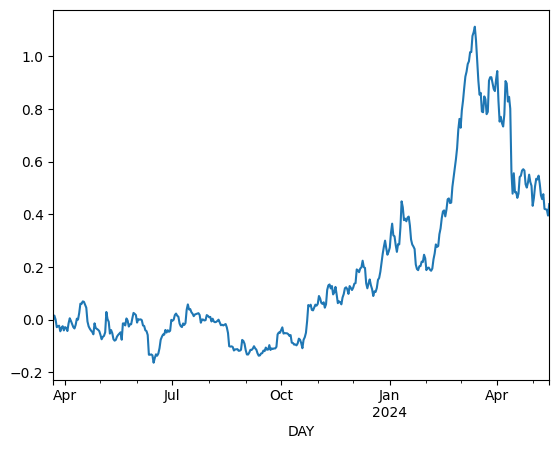

In [308]:
PORT_cum = (1 + portfolio_values).cumprod() - 1
PORT_cum.plot()

<Axes: xlabel='DAY'>

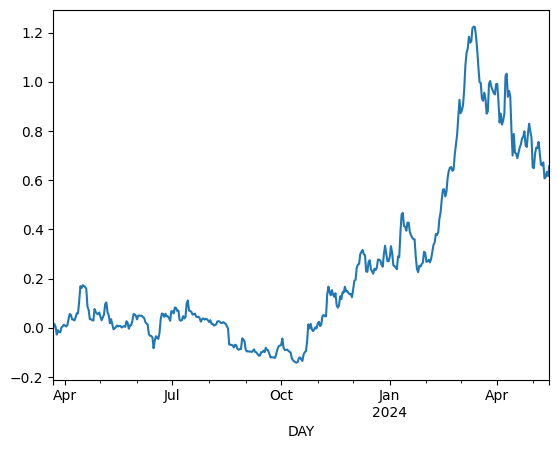

In [269]:
rl_cumulative_return.plot()

In [102]:
rl_normalized_returns.set_index('DAY', inplace=True)
rl_normalized_returns

PanamaDAO_treasury_return
DAY                                  
2023-03-22                 100.000000
2023-03-23                 101.579911
2023-03-24                 100.378671
2023-03-25                  97.222838
2023-03-26                  99.017197
...                               ...
2024-05-11                 160.742080
2024-05-12                 161.275543
2024-05-13                 163.352017
2024-05-14                 161.694409
2024-05-15                 165.713393

[421 rows x 1 columns]

In [ ]:
rl_co = rl_combined_all_assets[[f'DAILY_PRICE_{asset}' for asset in combined_assets]]
rl_co.loc[max_index]

In [ ]:
usdc_price = rl_co['DAILY_PRICE_USDC']
usdc_price[usdc_price > 1.05]

In [ ]:
prices = rl_combined_all_assets[[f'DAILY_PRICE_{asset}' for asset in combined_assets]]
prices = prices.pct_change().dropna()
prices = prices.loc[prices.index >= panama_dao_start_date]
prices

In [ ]:
rl_portfolio_returns.describe()

In [ ]:
# Find the index of the highest value in the Series
max_index = rl_portfolio_returns.idxmax()

print("Index of the highest value:", max_index)
print("Highest value:", rl_portfolio_returns.loc[max_index])


In [ ]:
composition_df

In [ ]:
max_index

In [ ]:
composition_df.index

In [ ]:
price_highest_day = prices.loc[max_index]
price_highest_day

In [ ]:
comp_highest_day = composition_df.loc[max_index]

print("Composition on the highest return day:")
print(comp_highest_day)

In [ ]:
returns_highest = price_highest_day.values * comp_highest_day.values
returns_highest.sum()

In [ ]:
composition_df.loc[max_index].sum()

In [ ]:
composition_df.loc[max_index].sum()
highest_comp_mvo = composition_df.loc[max_index]
# Plot the pie chart


plt.figure(figsize=(10, 7))
highest_comp_mvo.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Portfolio Composition')
plt.ylabel('')  # Hide the y-label
plt.show()



In [ ]:
rl_normalized_returns


In [ ]:
rl_normalized_returns.plot()

In [ ]:
latest_comp_rl = composition_df.iloc[-1]
# Plot the pie chart
def rl_composition():
    plt.figure(figsize=(10, 7))
    latest_comp_rl.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Portfolio Composition')
    plt.ylabel('')  # Hide the y-label
    plt.show()

In [ ]:
rl_portfolio_returns.max()

In [ ]:
rl_portfolio_returns[rl_portfolio_returns.index >= panama_dao_start_date]

In [ ]:
sortino(rl_portfolio_returns.values)

In [ ]:
# Plotting the portfolio value and cumulative return
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(rl_portfolio_returns.index, rl_portfolio_returns, label='Portfolio Value')
plt.plot(rl_cumulative_return.index, rl_cumulative_return, label='Cumulative Return')
plt.title('Portfolio Value and Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Assuming `cumulative_return` is a Series with index as `DAY`

# Convert cumulative_return Series to a DataFrame and reset index to get `DAY` as a column
cumulative_return_df = rl_cumulative_return.reset_index()
cumulative_return_df.columns = ['DAY', 'cumulative_return']

# Prepare base return (use cumulative_return as the base)
base_return = cumulative_return_df.copy()
base_return = base_return.dropna().rename(columns={'cumulative_return': 'base_cumulative_return'})

# Combine results
combined = base_return[['DAY', 'base_cumulative_return']].sort_values('DAY')

# Normalize returns
first_value = combined['base_cumulative_return'].iloc[0]
combined['PanamaDAO_treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))

# Final output
rl_normalized_returns = combined[['DAY', 'PanamaDAO_treasury_return']]

# Print the first few rows of normalized returns
print(rl_normalized_returns.head())
print(rl_normalized_returns.tail())


In [ ]:
rl_normalized_returns.set_index('DAY', inplace=True)
rl_normalized_returns.plot()

# Comparing Historical Vs MVO Vs RL

## Daily Returns

In [ ]:
rl_portfolio_returns

In [ ]:
mvo_daily_portfolio_returns

In [ ]:
historial_returns

In [ ]:
historical_sortino = sortino(historial_returns)

In [ ]:
mvo_sortino = sortino(mvo_daily_portfolio_returns)

In [ ]:
rl_sortino = sortino(rl_portfolio_returns)

## Cumulative Returns

In [ ]:
rl_cumulative_return

In [ ]:
mvo_cumulative_return

In [ ]:
historical_cumulative_return

## Normalized Returns

In [ ]:
rl_normalized_returns

In [ ]:
mvo_normalized_returns

In [ ]:
historical_normalized_returns

In [ ]:
indicies_path = '../data/index.csv'
indicies = pd.read_csv(indicies_path)
indicies.set_index('DAY', inplace=True)
indicies.dropna(inplace=True)
index_start = indicies.index[-1]
index_start
indicies

In [ ]:
def normalize(data, date):
    # Convert Series to DataFrame and ensure it has a 'cumulative_return' column
    if isinstance(data, pd.Series):
        data = data.to_frame(name='cumulative_return')
    else:
        data = data.rename(columns={'Portfolio Return': 'cumulative_return'})

    # Convert the DataFrame to reset index to allow slicing by position
    cumulative_return_df = data.reset_index()
    
    # Convert the 'DAY' column to datetime if it's not already
    cumulative_return_df['DAY'] = pd.to_datetime(cumulative_return_df['DAY'])

    # Filter the DataFrame to start from the specified date
    cumulative_return_df = cumulative_return_df[cumulative_return_df['DAY'] >= pd.to_datetime(date)]
    
    # Prepare base return (use cumulative_return as the base)
    base_return = cumulative_return_df.copy().dropna()
    
    # Drop any existing columns and rename them
    base_return = base_return[['DAY', 'cumulative_return']].rename(columns={'cumulative_return': 'base_cumulative_return'})

    # Combine results
    combined = base_return.sort_values('DAY')
    
    # Normalize returns
    first_value = combined['base_cumulative_return'].iloc[0]  # Get the first value
    combined['treasury_return'] = 100 + (100 * (combined['base_cumulative_return'] - first_value))
    
    # Final output
    normalized_returns = combined[['DAY', 'treasury_return']]
    normalized_returns.set_index('DAY', inplace=True)
    
    return normalized_returns


In [ ]:
rl_cumulative_return

In [ ]:
index_historical_normalized = normalize(historical_cumulative_return, index_start)
index_rl_normalized = normalize(rl_cumulative_return, index_start)
index_mvo_normalized = normalize(mvo_cumulative_return, index_start)

In [ ]:
index_mvo_normalized.rename(columns={'treasury_return':'MVO Treasury Robo Advisor Return'}, inplace=True)

In [ ]:
index_rl_normalized.rename(columns={'treasury_return':'RL Treasury Robo Advisor Return'}, inplace=True)

In [ ]:
index_historical_normalized.rename(columns={'treasury_return':'Historical PanamaDAO Treasury Return'}, inplace=True)

In [ ]:
index_historical_normalized.index

In [ ]:
indicies.index = pd.to_datetime(indicies.index)
combined_indicies = indicies.merge(index_historical_normalized, left_index=True, right_index=True, how='left')
combined_indicies = combined_indicies.merge(index_mvo_normalized, left_index=True, right_index=True, how='left')
combined_indicies = combined_indicies.merge(index_rl_normalized, left_index=True, right_index=True, how='left')

In [ ]:
combined_indicies.columns

In [ ]:
combined_indicies.drop(columns=['WBTC_DAILY_RETURN','SOL_DAILY_RETURN','WETH_DAILY_RETURN','SOL_NORMALIZED_PRICE','WBTC_NORMALIZED_PRICE','WETH_NORMALIZED_PRICE'], inplace=True)

In [ ]:
# Plot the comparison
plt.figure(figsize=(14, 8))
plt.plot(historical_normalized_returns.index, historical_normalized_returns['PanamaDAO_treasury_return'], label='Historical Normalized Returns', color='blue')
plt.plot(mvo_normalized_returns.index, mvo_normalized_returns['PanamaDAO_treasury_return'], label='MVO Normalized Returns', color='red')
plt.plot(rl_normalized_returns.index, rl_normalized_returns['PanamaDAO_treasury_return'], label='RL Normalized Returns', color='yellow')

# Add title and labels
plt.title('Comparison of Historical and Robo Advisor Normalized Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Returns')
plt.legend()

historical_return = historical_cumulative_return.iloc[-1] * 100
rl_return = rl_cumulative_return.iloc[-1] * 100
mvo_return = mvo_cumulative_return.iloc[-1] * 100

print(f'historical cumulative return {historical_return:.2f}%')
print(f'rl cumulative return {rl_return:.2f}%')
print(f'mvo cumulative return {mvo_return:.2f}%')

plt.show()

In [ ]:
plt.figure(figsize=(14, 8))  # Adjust the width and height as needed
plt.plot(combined_indicies)
plt.legend(combined_indicies.columns)
plt.title('Normalized Comparison of DAO Indicies to Robo Advisor Returns')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot pie chart for MVO composition
def mvo_composition(ax): 
    latest_comp_mvo.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title('MVO Portfolio Composition')
    ax.set_ylabel('')  # Hide the y-label

# Define a function to plot pie chart for historical composition
def historical_composition(ax):
    latest_historical_comp.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title('Historical Portfolio Composition')
    ax.set_ylabel('')  # Hide the y-label

# Define a function to plot pie chart for RL composition
def rl_composition(ax):
    latest_comp_rl.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title('RL Portfolio Composition')
    ax.set_ylabel('')  # Hide the y-label

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

mvo_composition(axs[0])
historical_composition(axs[1])
rl_composition(axs[2])

plt.tight_layout()
plt.show()


## Market Comparisons - Beta

In [ ]:
#!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Align the data sets by date
# Prepare data for linear regression

def calculate_beta(data, columnx, columny):
    X = data[f'{columnx}'].values.reshape(-1, 1)  # DPI returns
    Y = data[f'{columny}'].values  # MKR returns

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Output the beta
    beta = model.coef_[0]
    return beta


In [ ]:
def calculate_cagr(history):
    initial_value = history.iloc[0]
    final_value = history.iloc[-1]
    number_of_years = (history.index[-1] - history.index[0]).days / 365.25

    cagr = (final_value / initial_value) ** (1 / number_of_years) - 1
    cagr_percentage = cagr * 100
    print(f"The CAGR is {cagr_percentage:.2f}%")
    return cagr

In [ ]:
combined_indicies.columns

In [ ]:
rl_beta = calculate_beta(combined_indicies, 'SIRLOIN_INDEX', 'RL Treasury Robo Advisor Return')
rl_cagr = calculate_cagr(combined_indicies['RL Treasury Robo Advisor Return'])
print(f"Beta: {rl_beta}")


In [ ]:
mvo_beta = calculate_beta(combined_indicies, 'SIRLOIN_INDEX', 'MVO Treasury Robo Advisor Return')
mvo_cagr = calculate_cagr(combined_indicies['MVO Treasury Robo Advisor Return'])
print(f"Beta: {mvo_beta}")


In [ ]:
historical_beta = calculate_beta(combined_indicies, 'SIRLOIN_INDEX', 'Historical PanamaDAO Treasury Return')
historical_cagr = calculate_cagr(combined_indicies['Historical PanamaDAO Treasury Return'])
print(f"Beta: {historical_beta}")


In [ ]:
prices = pivot_assets.copy()
prices.set_index('DAY', inplace=True)
dpi_history = prices['DAILY_PRICE_DPI']

In [ ]:
dpi_history.head()

In [ ]:

dpi_cagr = calculate_cagr(dpi_history)
    
dpi_cumulative_risk_premium = dpi_cagr - current_risk_free
print('CAGR:', dpi_cagr)
print('Cumulative Risk Premium:',dpi_cumulative_risk_premium)
dpi_history.plot()

In [ ]:
#DEFI_TREASURY_INDEX

defi_index_history = combined_indicies['DEFI_TREASURY_INDEX']

defi_index_cagr = calculate_cagr(defi_index_history)
defi_index_cumulative_risk_premium = defi_index_cagr - current_risk_free
print('CAGR:', defi_index_cagr)
print('Cumulative Risk Premium:',defi_index_cumulative_risk_premium)

defi_index_history.plot()

In [ ]:
#DEFI_TREASURY_INDEX

sirloin_history = combined_indicies['SIRLOIN_INDEX']

sirloin_cagr = calculate_cagr(sirloin_history)
sirloin_cumulative_risk_premium = sirloin_cagr - current_risk_free
print('CAGR:', sirloin_cagr)
print('Cumulative Risk Premium:',sirloin_cumulative_risk_premium)

sirloin_history.plot()

In [ ]:
current_risk_free

In [ ]:
import plotly.graph_objs as go

In [ ]:
combined_indicies.columns

In [ ]:
defi_index_cagr = calculate_cagr(combined_indicies['DEFI_TREASURY_INDEX'])
non_defi_index_cagr = calculate_cagr(combined_indicies['NON_DEFI_TREASURY_INDEX'])

defi_index_beta = calculate_beta(combined_indicies, 'SIRLOIN_INDEX', 'DEFI_TREASURY_INDEX')
non_defi_index_beta = calculate_beta(combined_indicies, 'SIRLOIN_INDEX', 'NON_DEFI_TREASURY_INDEX')



In [ ]:
defi_index_beta

In [ ]:
non_defi_index_beta

In [ ]:
def create_interactive_sml(risk_free_rate, market_risk_premium, rl_beta, mvo_beta, historical_beta, defi_beta, non_defi_beta, rl_return, mvo_return, historical_return, defi_return, non_defi_return):
        betas = np.linspace(0, 8, 100)
        expected_returns = risk_free_rate + betas * market_risk_premium
    
        # Create the SML line
        sml_line = go.Scatter(x=betas, y=expected_returns, mode='lines', name=f'SML')
    
        # Add MakerDAO token as points for expected (based on selected market risk premium) and actual returns
        rl_expected = go.Scatter(
            x=[rl_beta],
            y=[risk_free_rate + rl_beta * market_risk_premium],  # Use the selected market risk premium
            mode='markers', 
            marker=dict(color='red'),
            name=f'RL Expected'
        )
        
        rl_actual = go.Scatter(
            x=[rl_beta],
            y=[rl_return],
            mode='markers', 
            marker=dict(color='pink'),
            name=f'RL Actual'
        )
    
        # Add LidoDAO token as points for expected and actual returns
        mvo_expected = go.Scatter(
            x=[mvo_beta],
            y=[risk_free_rate + mvo_beta * market_risk_premium],  # Use the selected market risk premium
            mode='markers', 
            marker=dict(color='blue'),
            name=f'MVO Expected'
        )
        
        mvo_actual = go.Scatter(
            x=[mvo_beta],
            y=[mvo_return],
            mode='markers', 
            marker=dict(color='lightblue'),
            name=f'MVO Actual'
        )
    
        # Convert rpl_beta from array to scalar if necessary
        #rpl_beta_value = rpl_beta[0] if isinstance(rpl_beta, np.ndarray) else rpl_beta
    
        # Add Rocket Pool token as points for expected and actual returns
        historical_expected = go.Scatter(
            x=[historical_beta],
            y=[risk_free_rate + historical_beta * market_risk_premium],  # Use the selected market risk premium
            mode='markers',
            marker=dict(color='orange'),
            name='Historical Expected'
        )
        
        historical_actual = go.Scatter(
            x=[historical_beta],
            y=[historical_return],
            mode='markers',
            marker=dict(color='yellow'),
            name='Historical Actual'
        )
        
        defi_expected = go.Scatter(
            x=[defi_beta],
            y=[risk_free_rate + defi_beta * market_risk_premium],  # Use the selected market risk premium
            mode='markers',
            marker=dict(color='purple'),
            name='Defi Treasury Index Expected'
        )
        
        defi_actual = go.Scatter(
            x=[defi_beta],
            y=[defi_return],
            mode='markers',
            marker=dict(color='navy'),
            name='Defi Treasury Index Actual'
        )
        
        non_defi_expected = go.Scatter(
            x=[non_defi_beta],
            y=[risk_free_rate + non_defi_beta * market_risk_premium],  # Use the selected market risk premium
            mode='markers',
            marker=dict(color='grey'),
            name='Non-Defi Treasury Index Expected'
        )
        
        non_defi_actual = go.Scatter(
            x=[non_defi_beta],
            y=[non_defi_return],
            mode='markers',
            marker=dict(color='tan'),
            name='Non-Defi Treasury Index Actual'
        )
        
        
    
        # Add Risk-Free Rate line
        risk_free_line = go.Scatter(
            x=[0, max(betas)], 
            y=[risk_free_rate, risk_free_rate], 
            mode='lines', 
            line=dict(dash='dash', color='green'),
            name='Risk-Free Rate'
        )
    
        # Layout settings
        layout = go.Layout(
            title=f'SML',
            xaxis=dict(title='Beta (Systematic Risk)'),
            yaxis=dict(title='Return'),
            showlegend=True
        )
    
        # Combine all the plots
        fig = go.Figure(data=[sml_line, rl_expected, rl_actual, mvo_expected, mvo_actual, historical_expected, historical_actual, 
                              defi_expected, defi_actual, non_defi_expected,non_defi_actual, risk_free_line], layout=layout)
        return fig, market_risk_premium


In [ ]:
historical_cagr

In [ ]:
fig, market_risk_premiume = create_interactive_sml(
    current_risk_free,
    sirloin_cumulative_risk_premium,
    rl_beta,
    mvo_beta,
    historical_beta,
    defi_index_beta,
    non_defi_index_beta,
    rl_cagr,
    mvo_cagr,
    historical_cagr,
    defi_index_cagr,
    non_defi_index_cagr

    

)

In [ ]:
fig